C:\Users\Abhinav Shaw\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
C:\Users\Abhinav Shaw\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
C:\Users\Abhinav Shaw\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


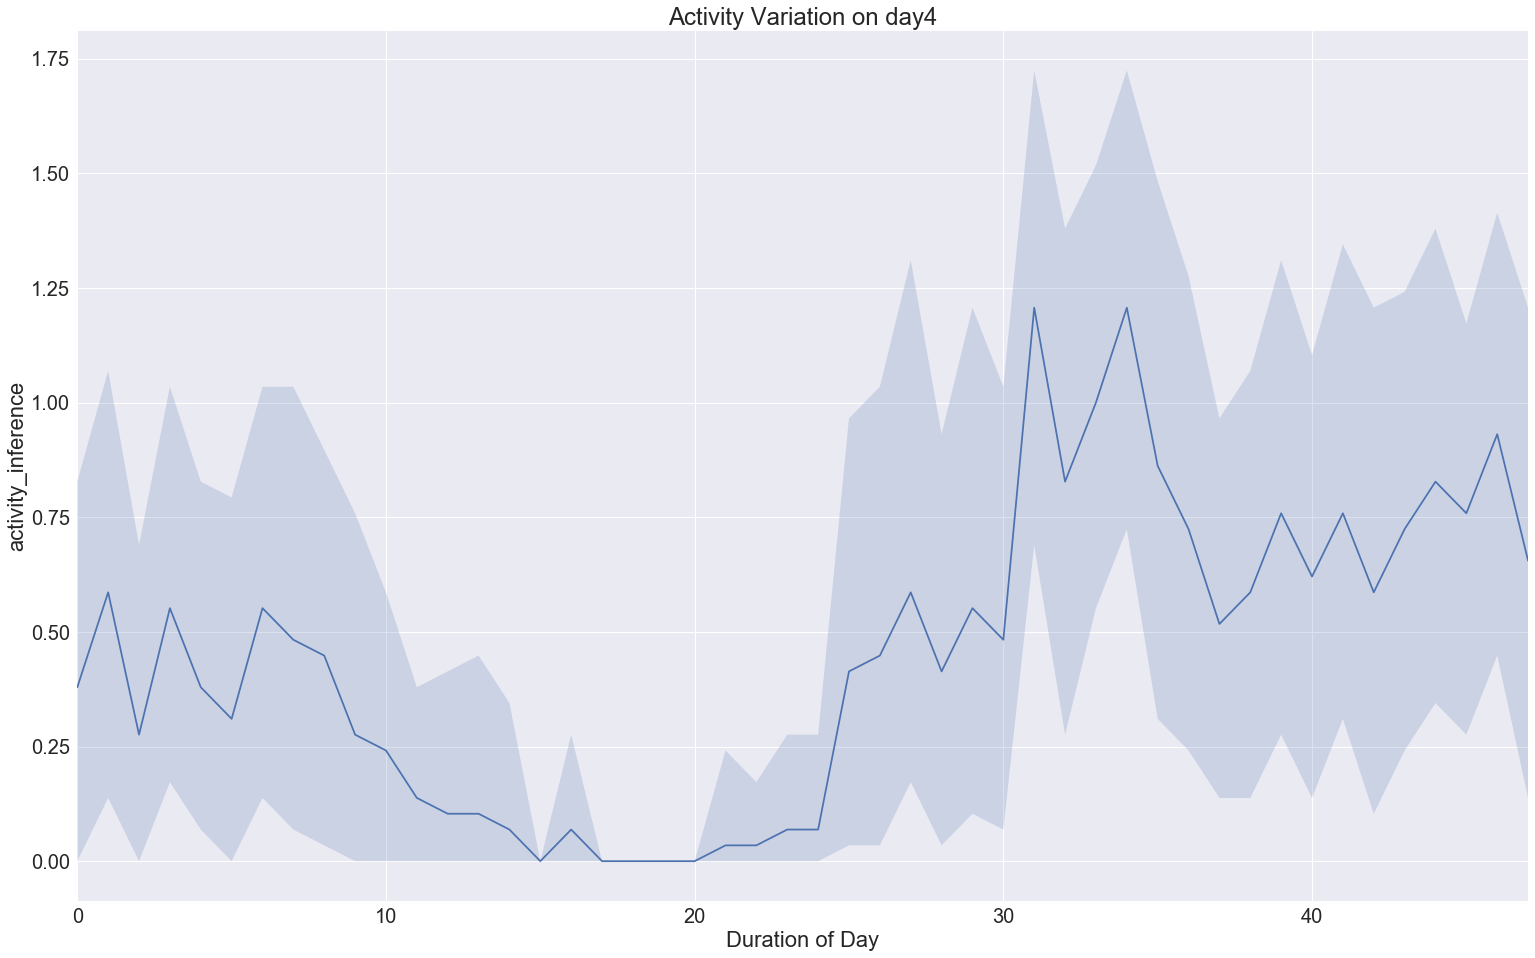

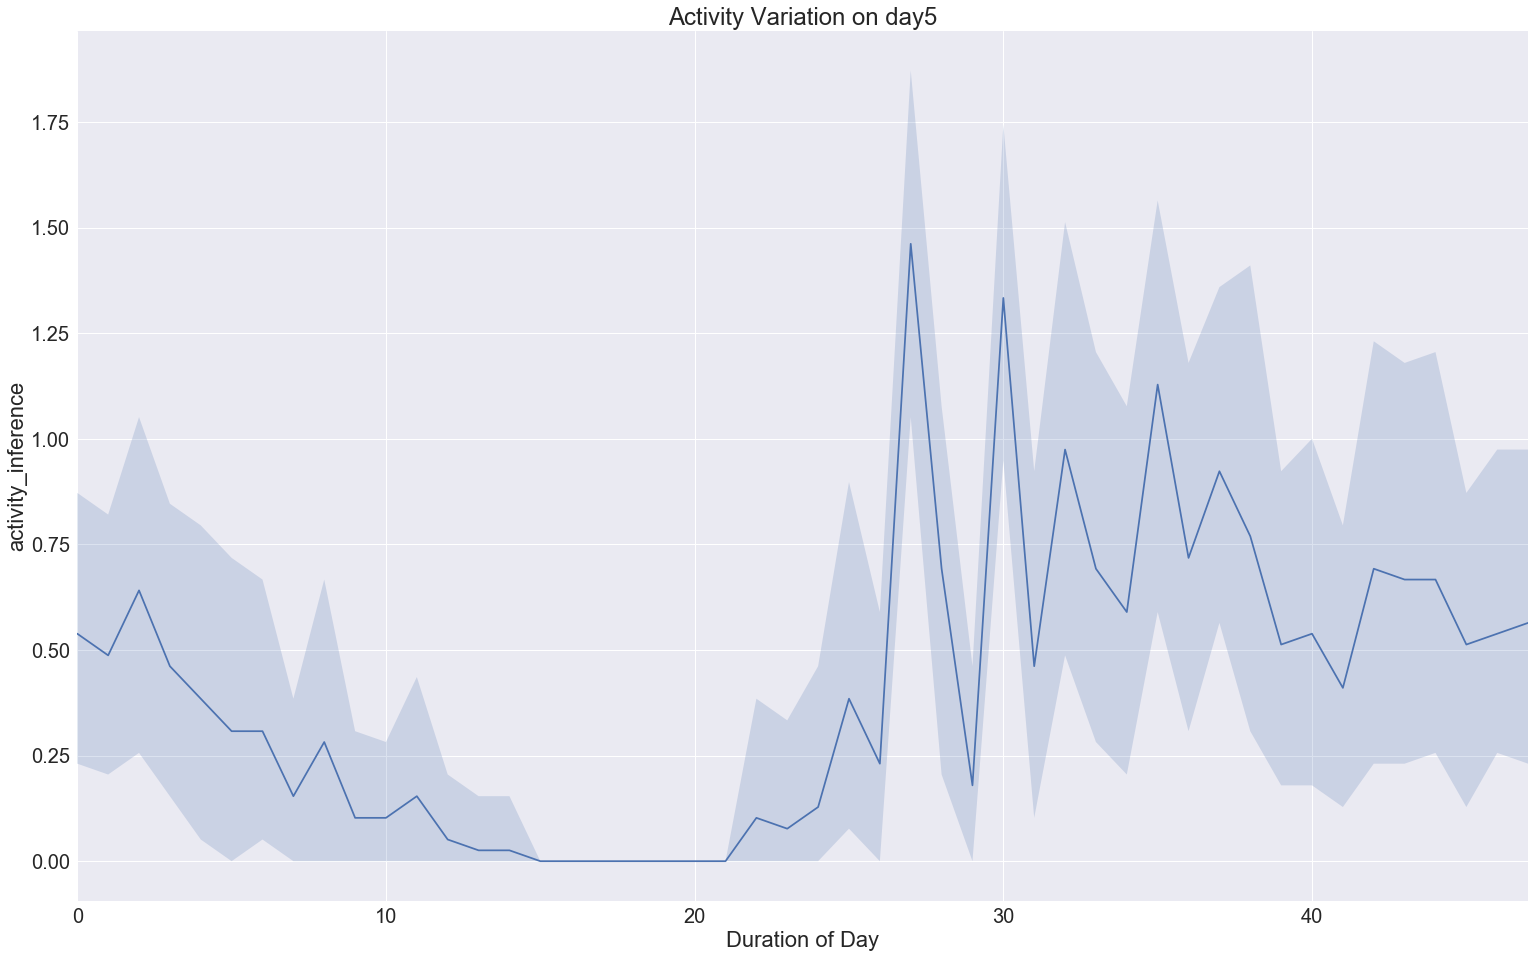

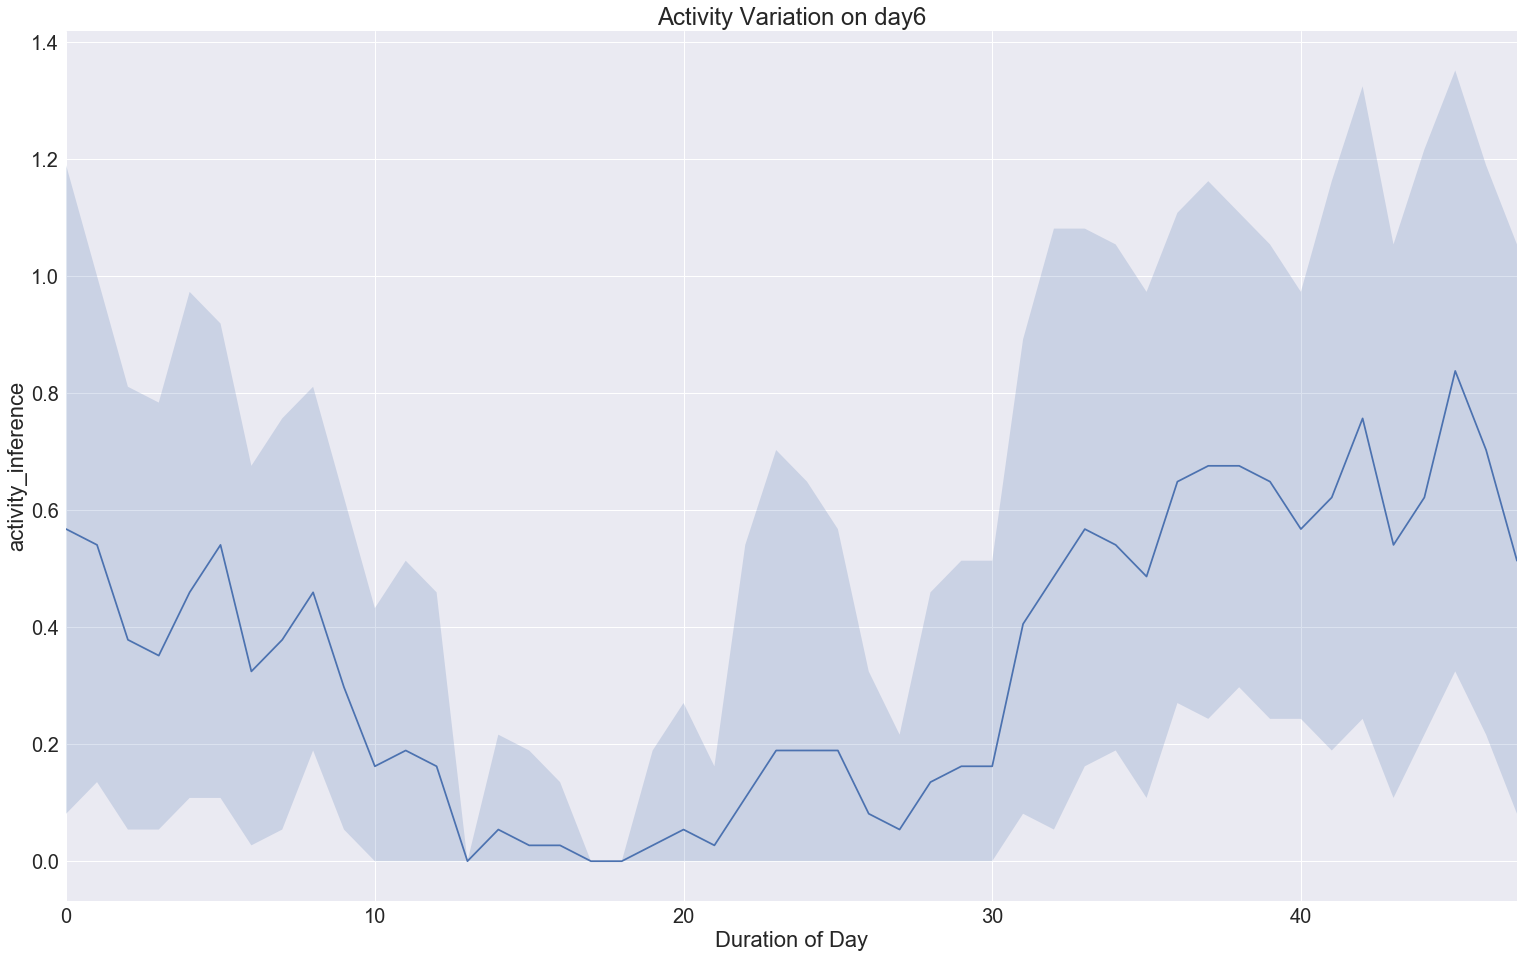

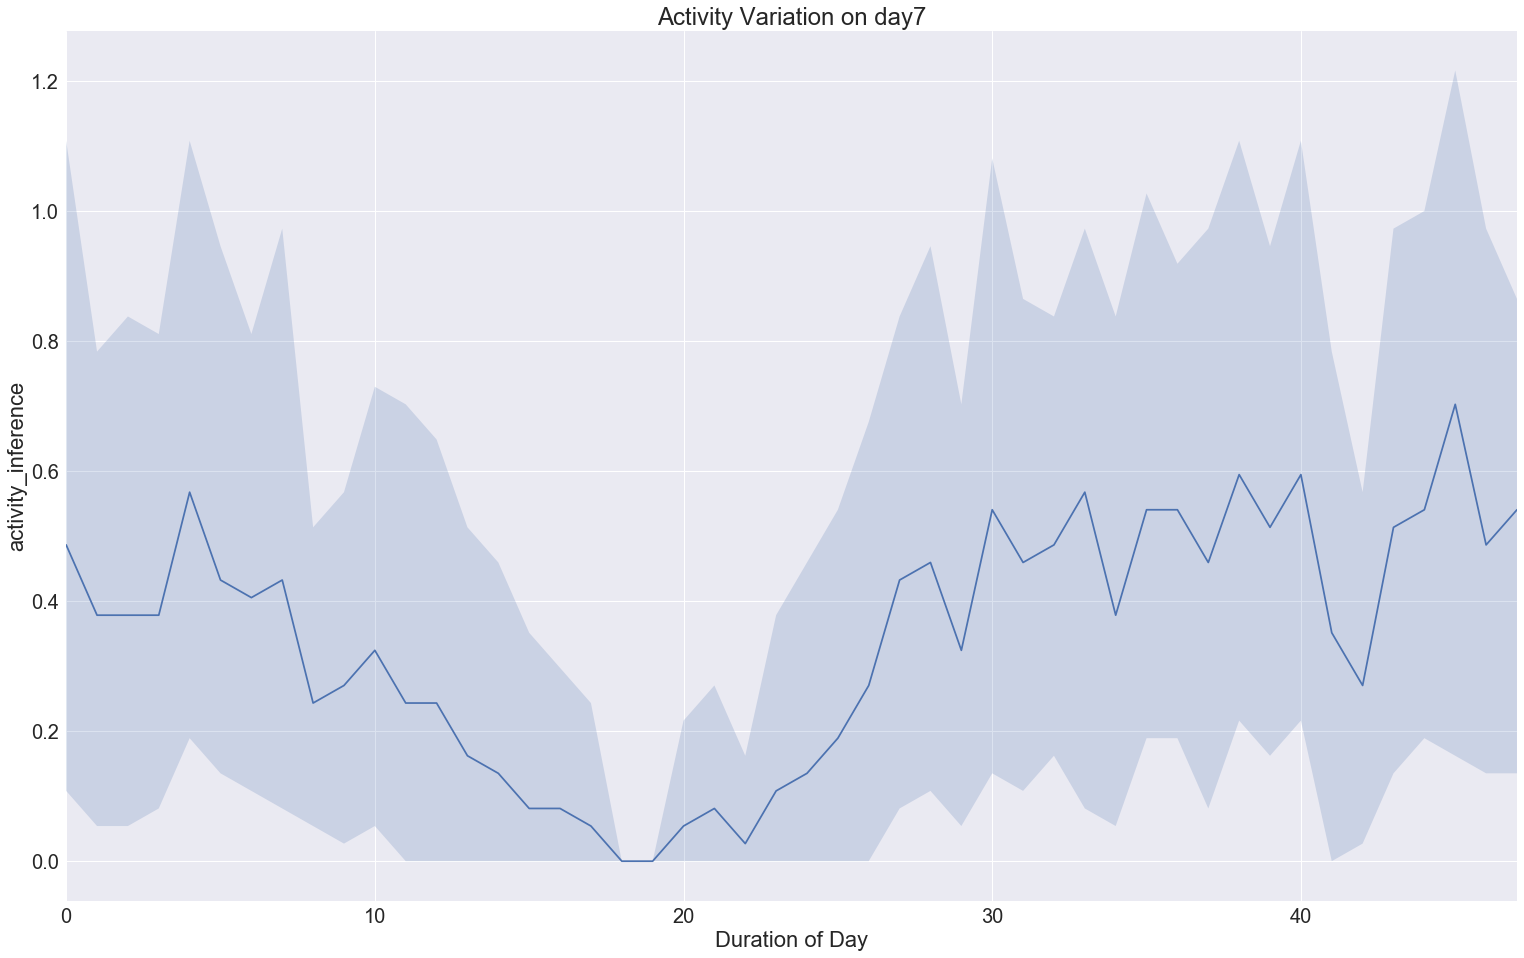

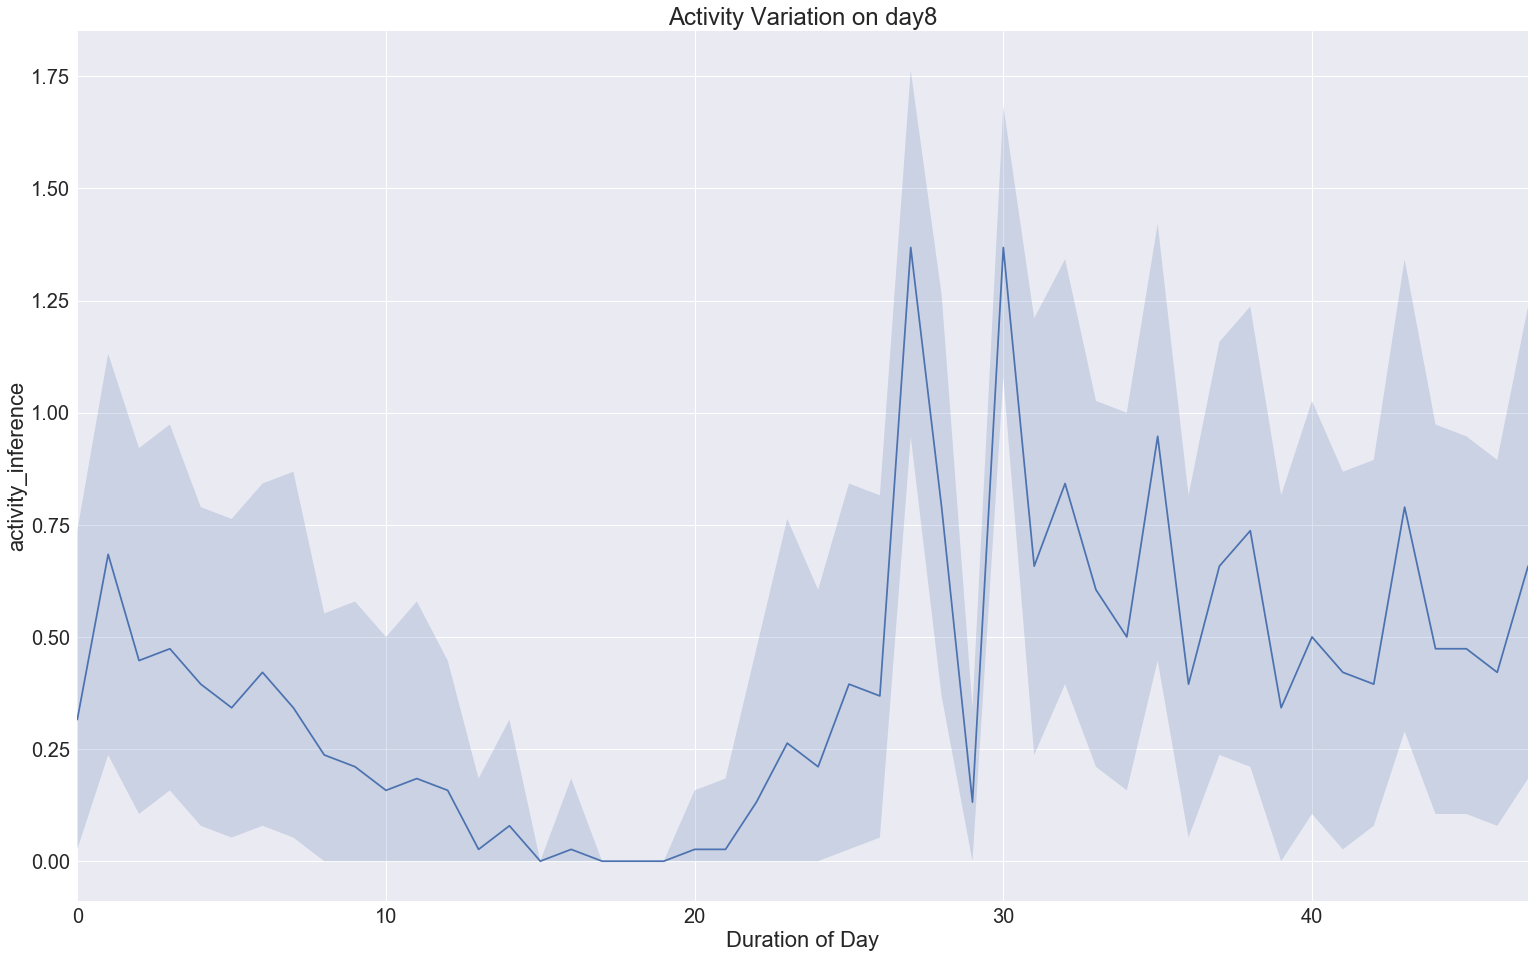

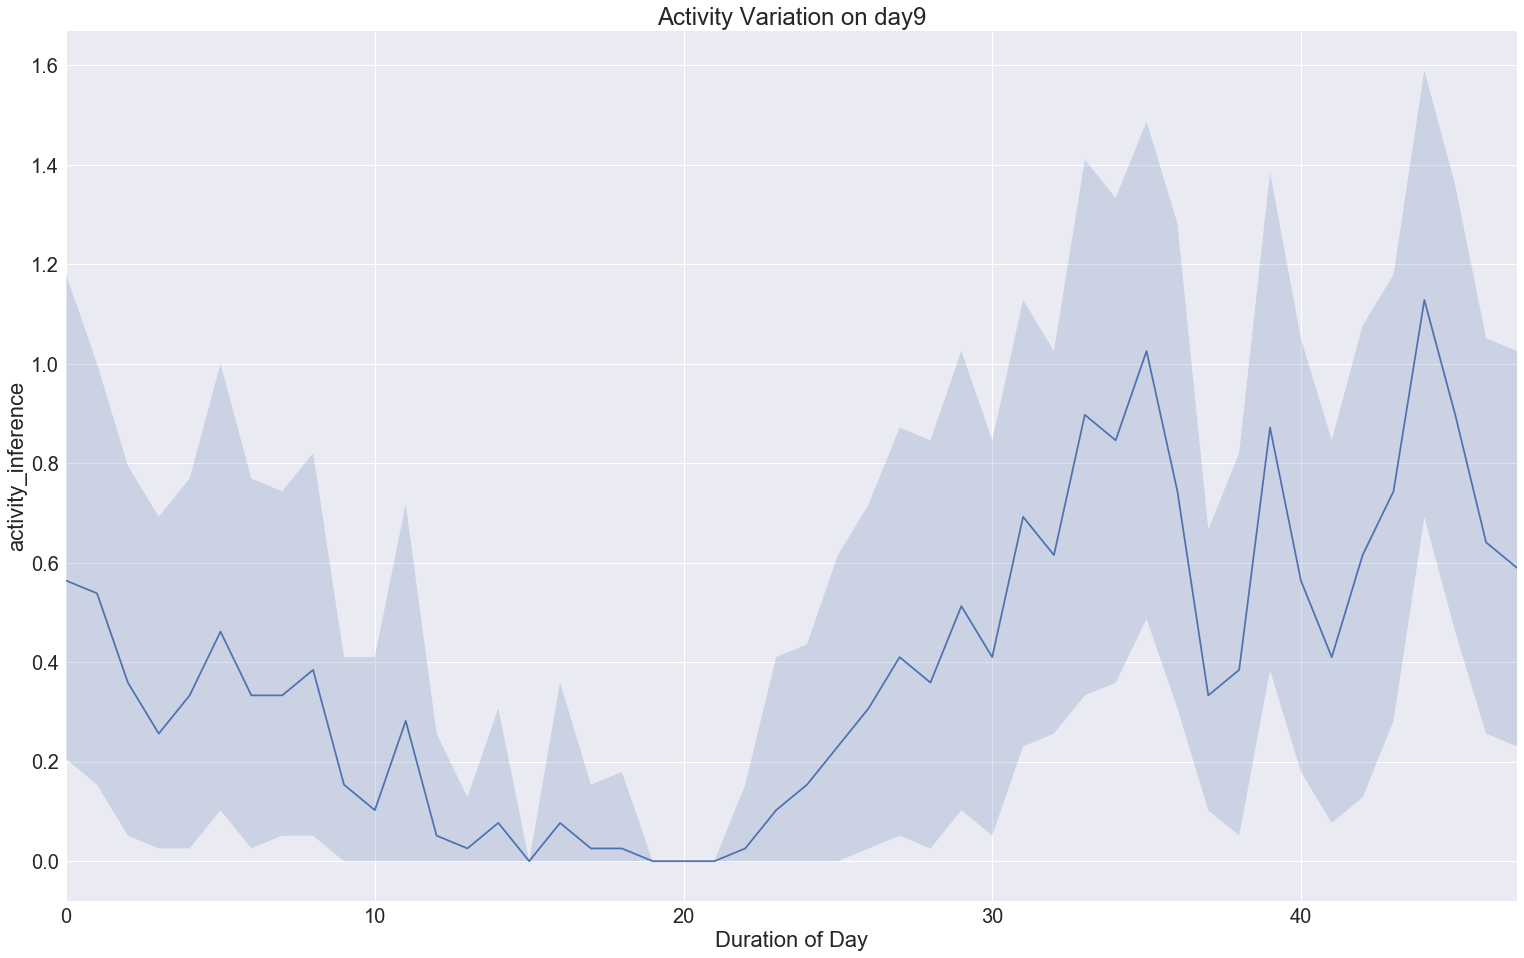

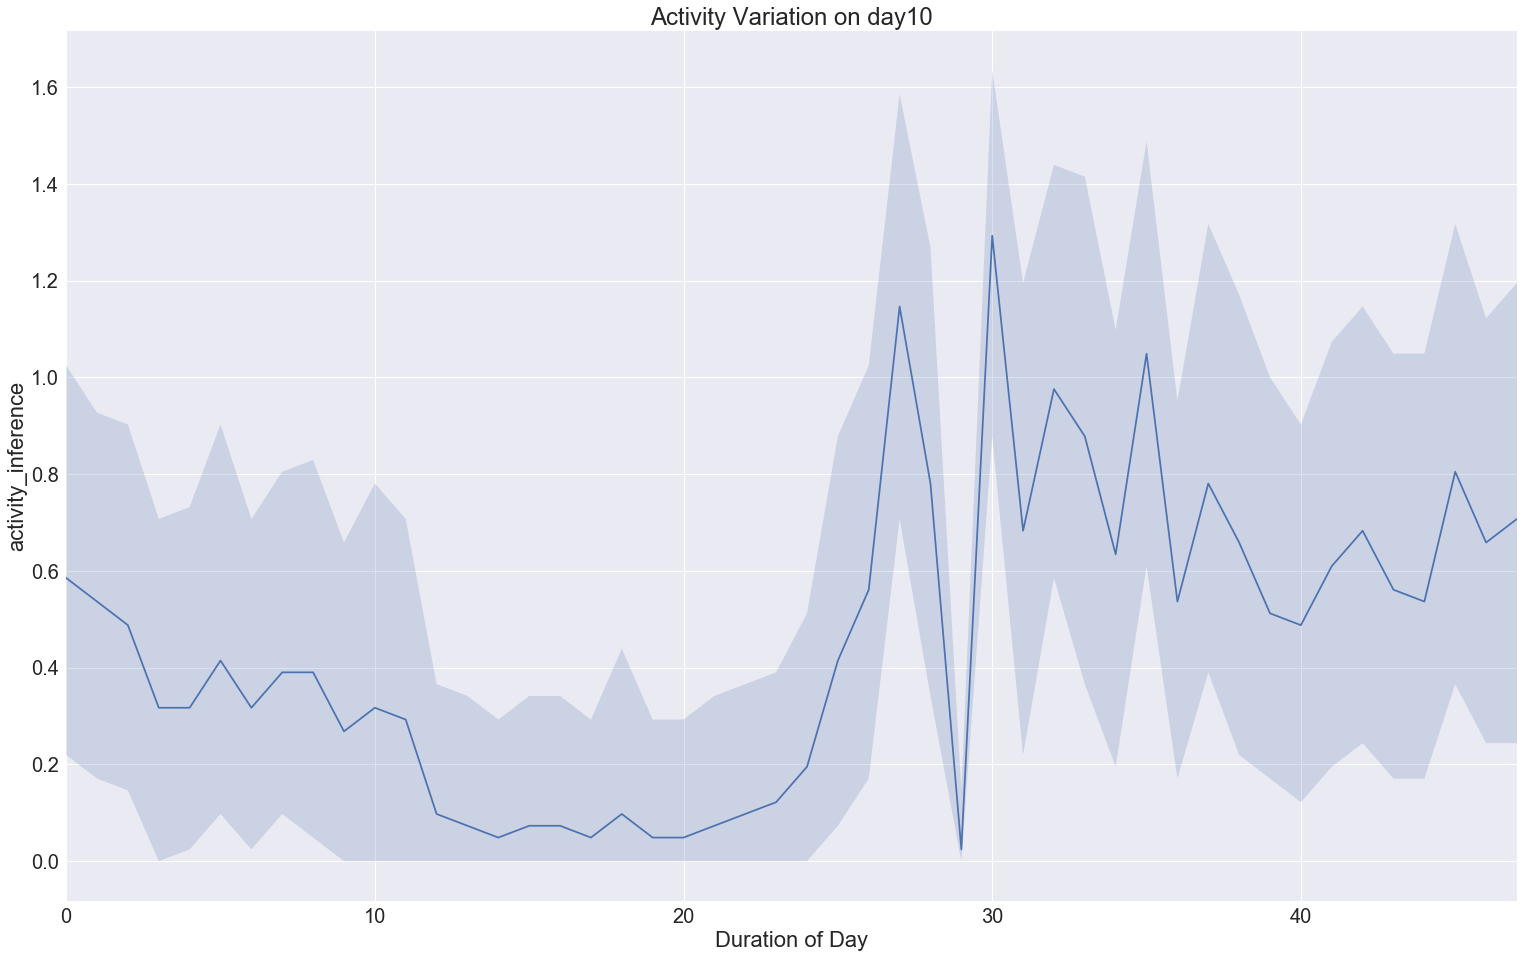

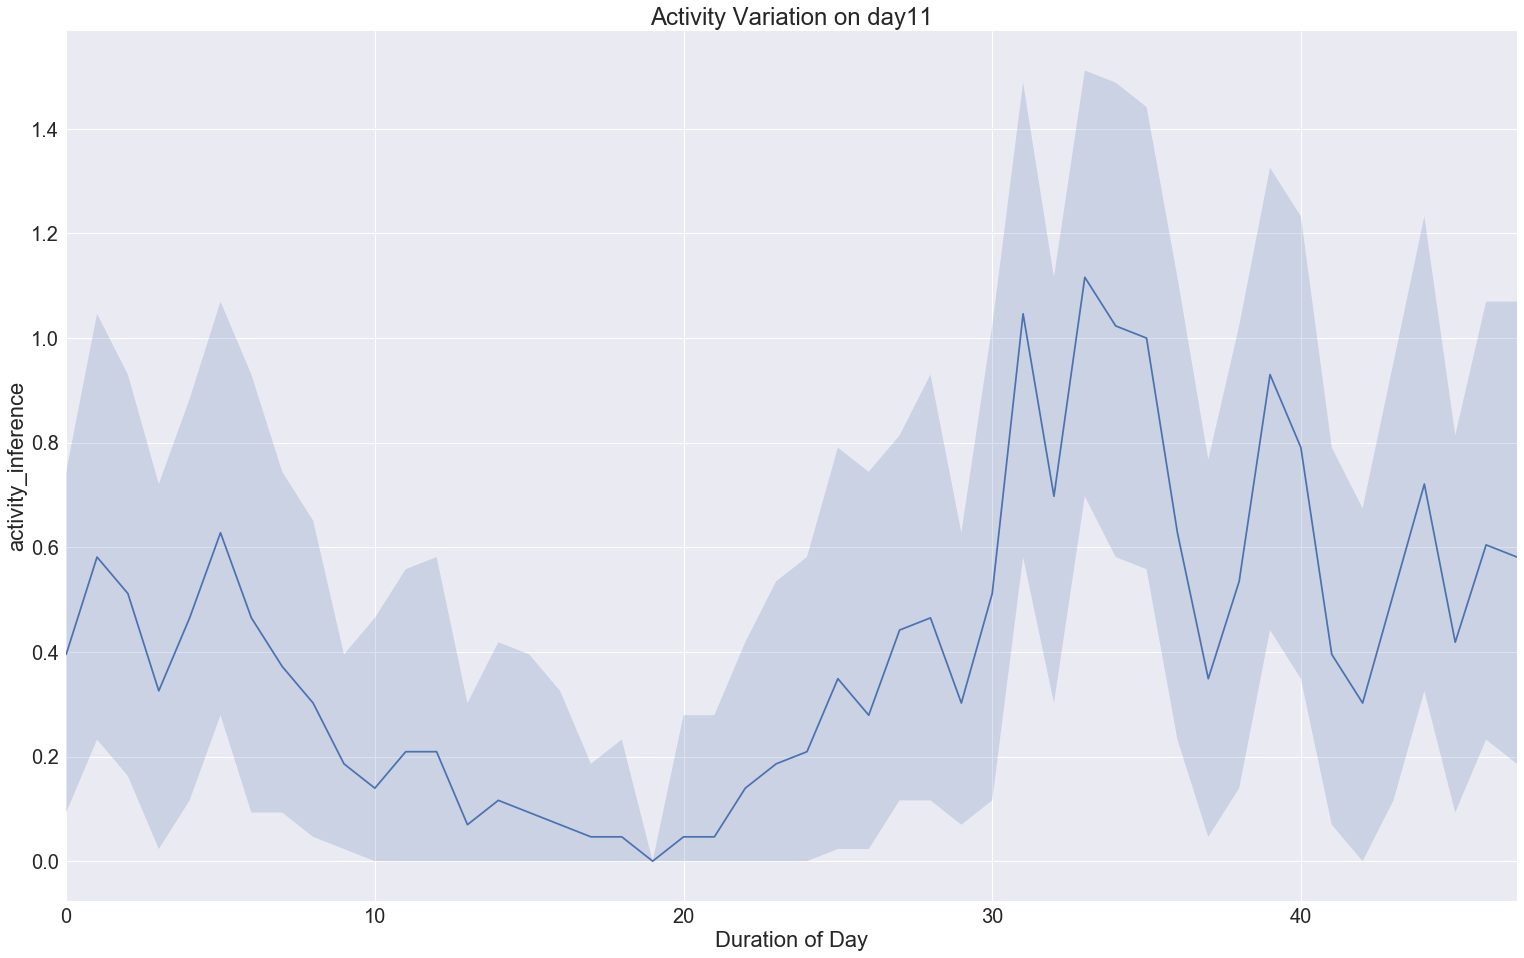

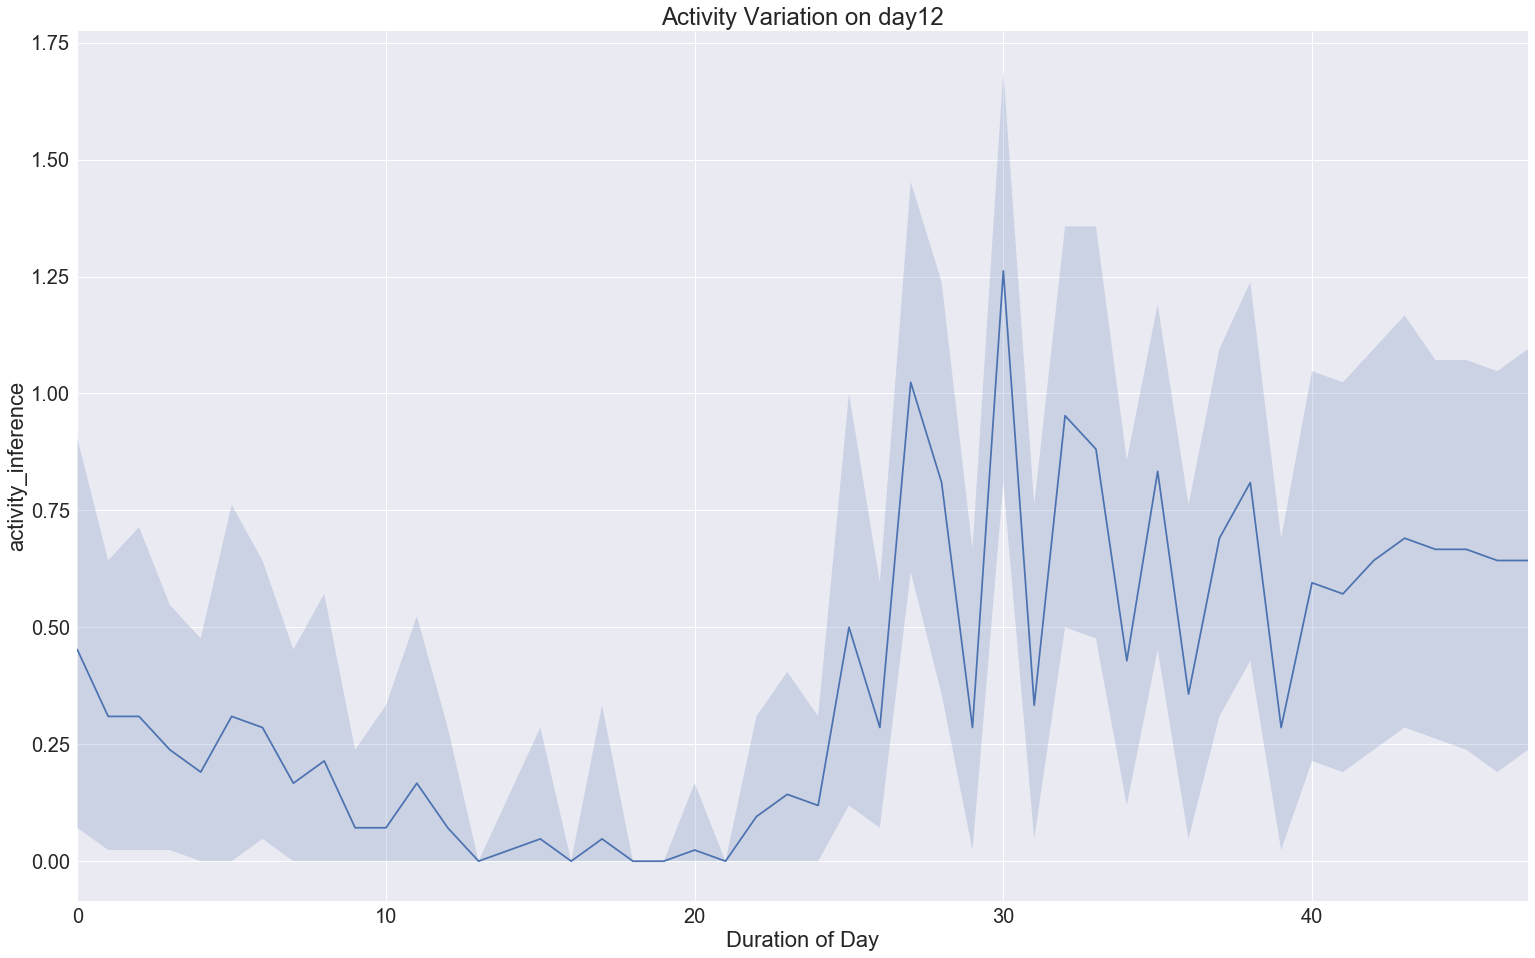

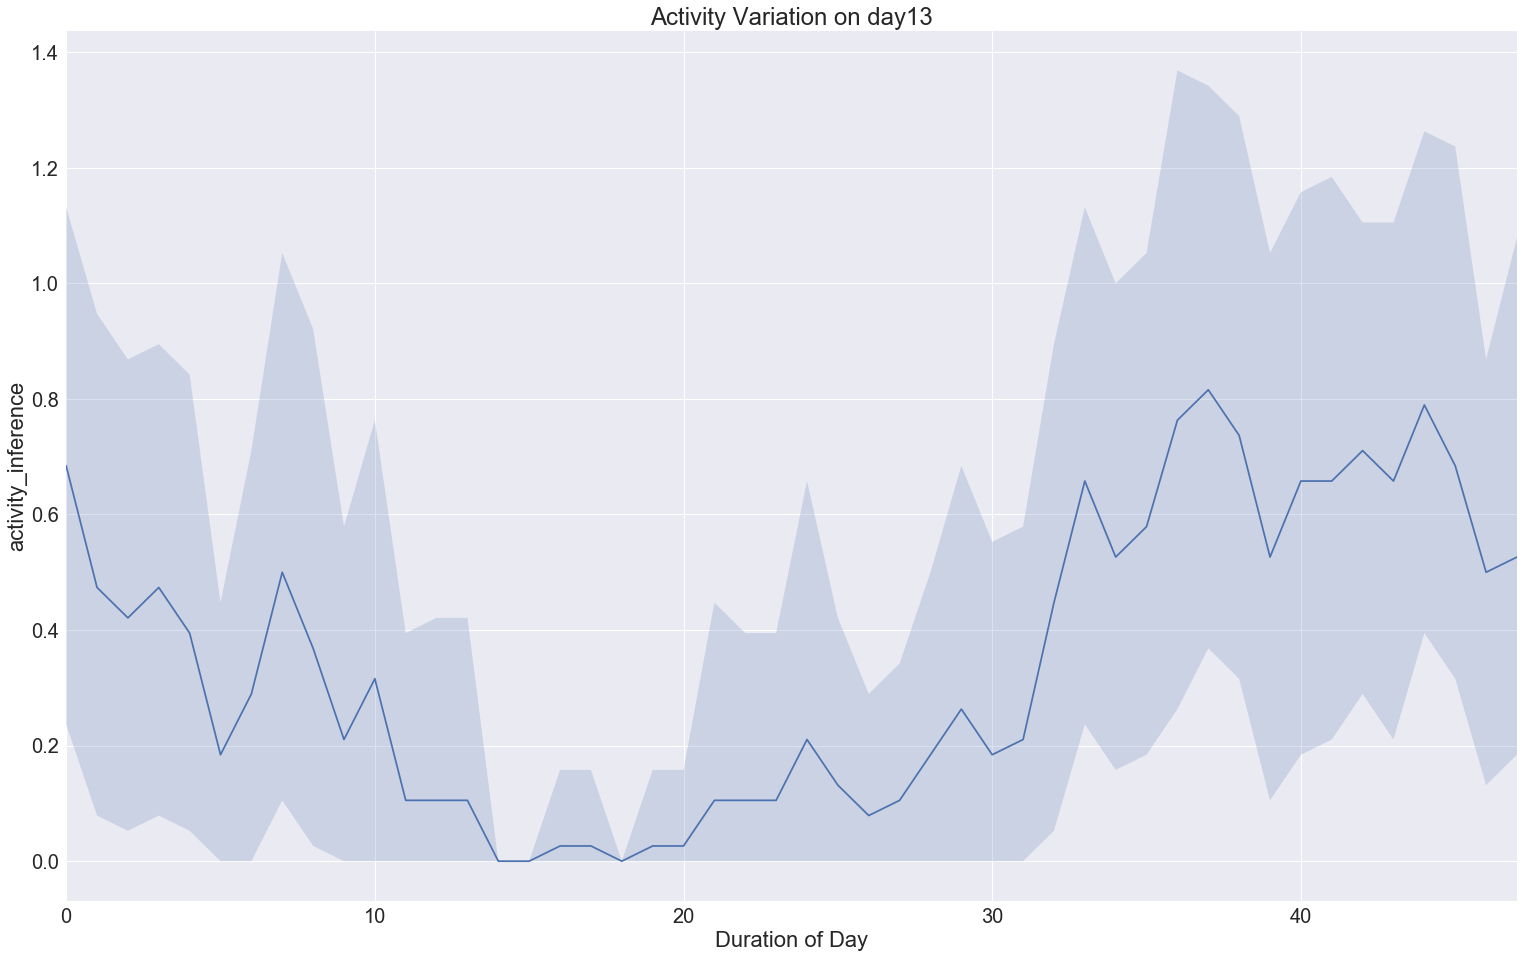

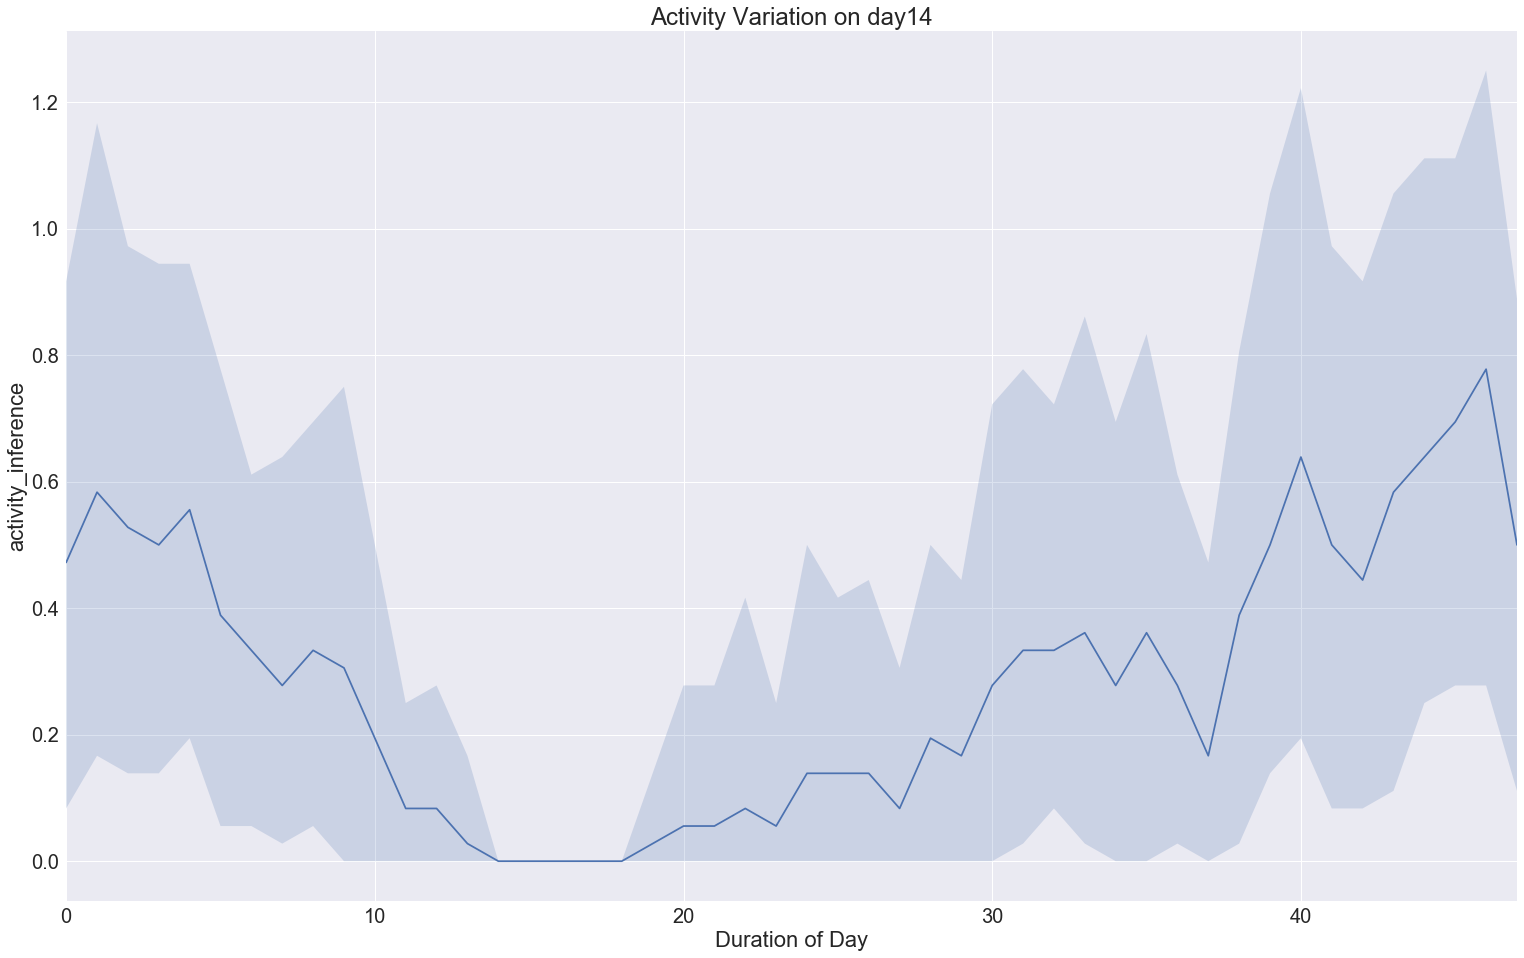

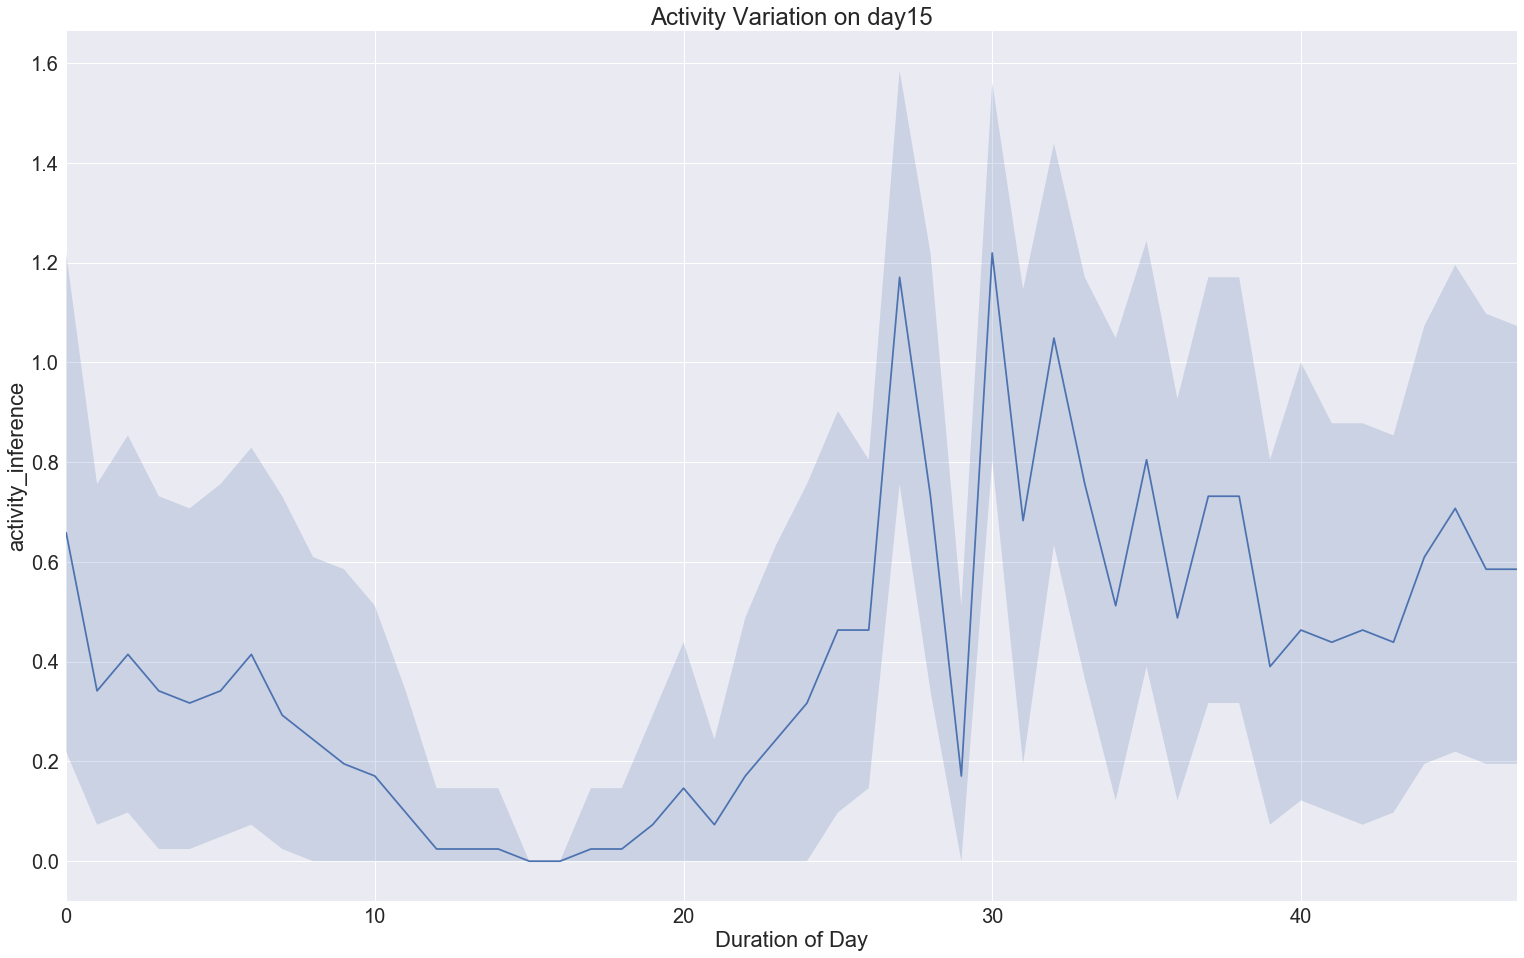

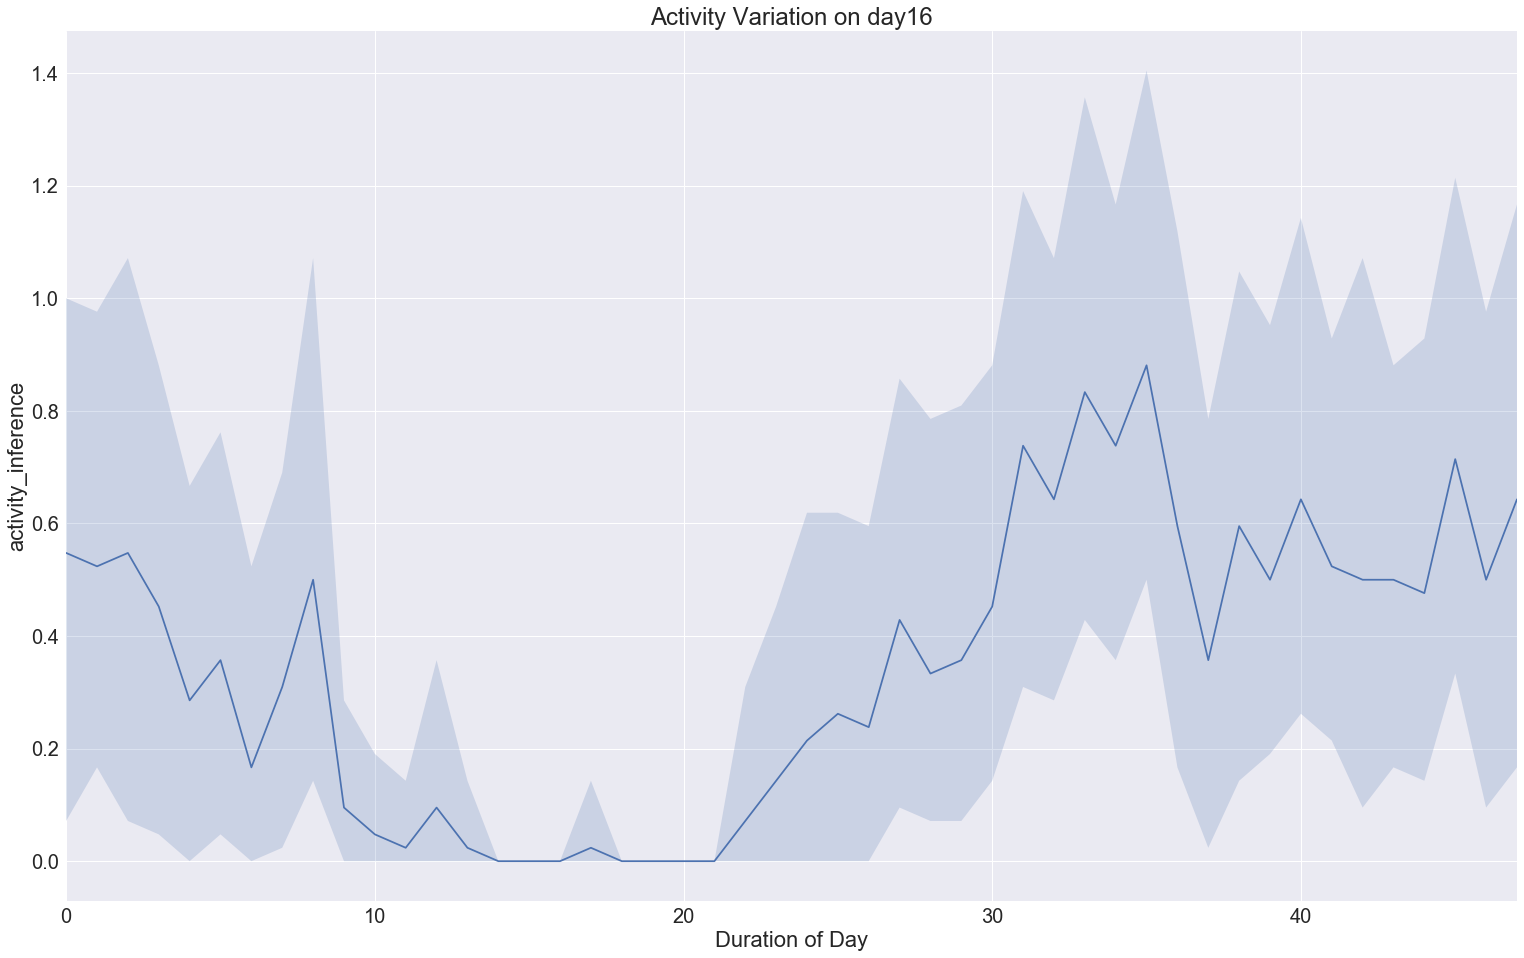

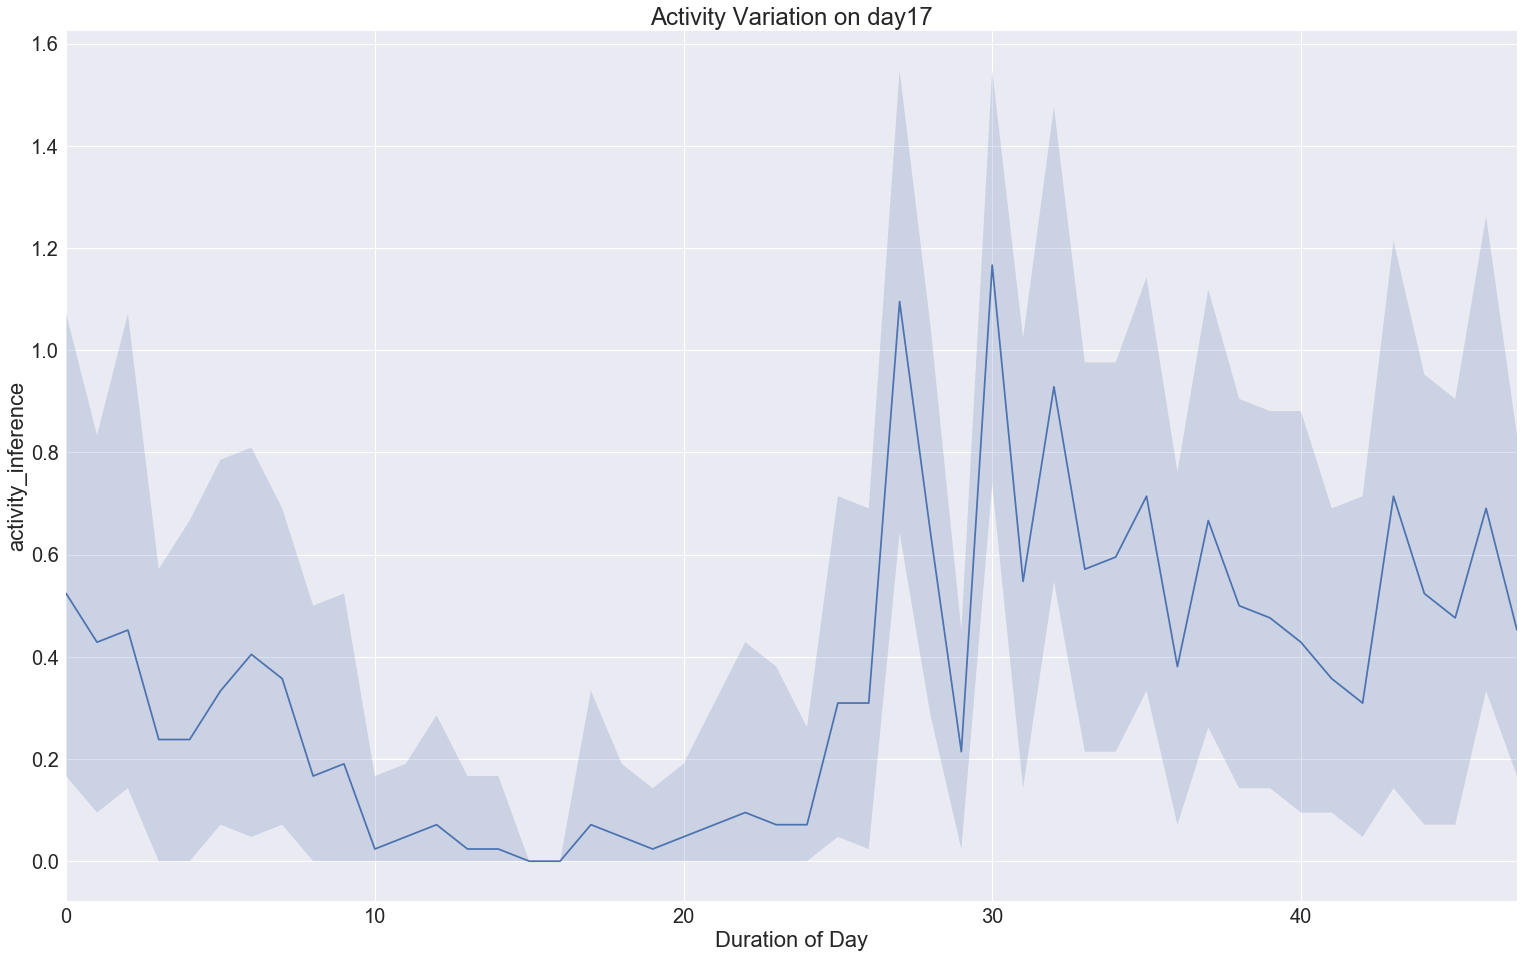

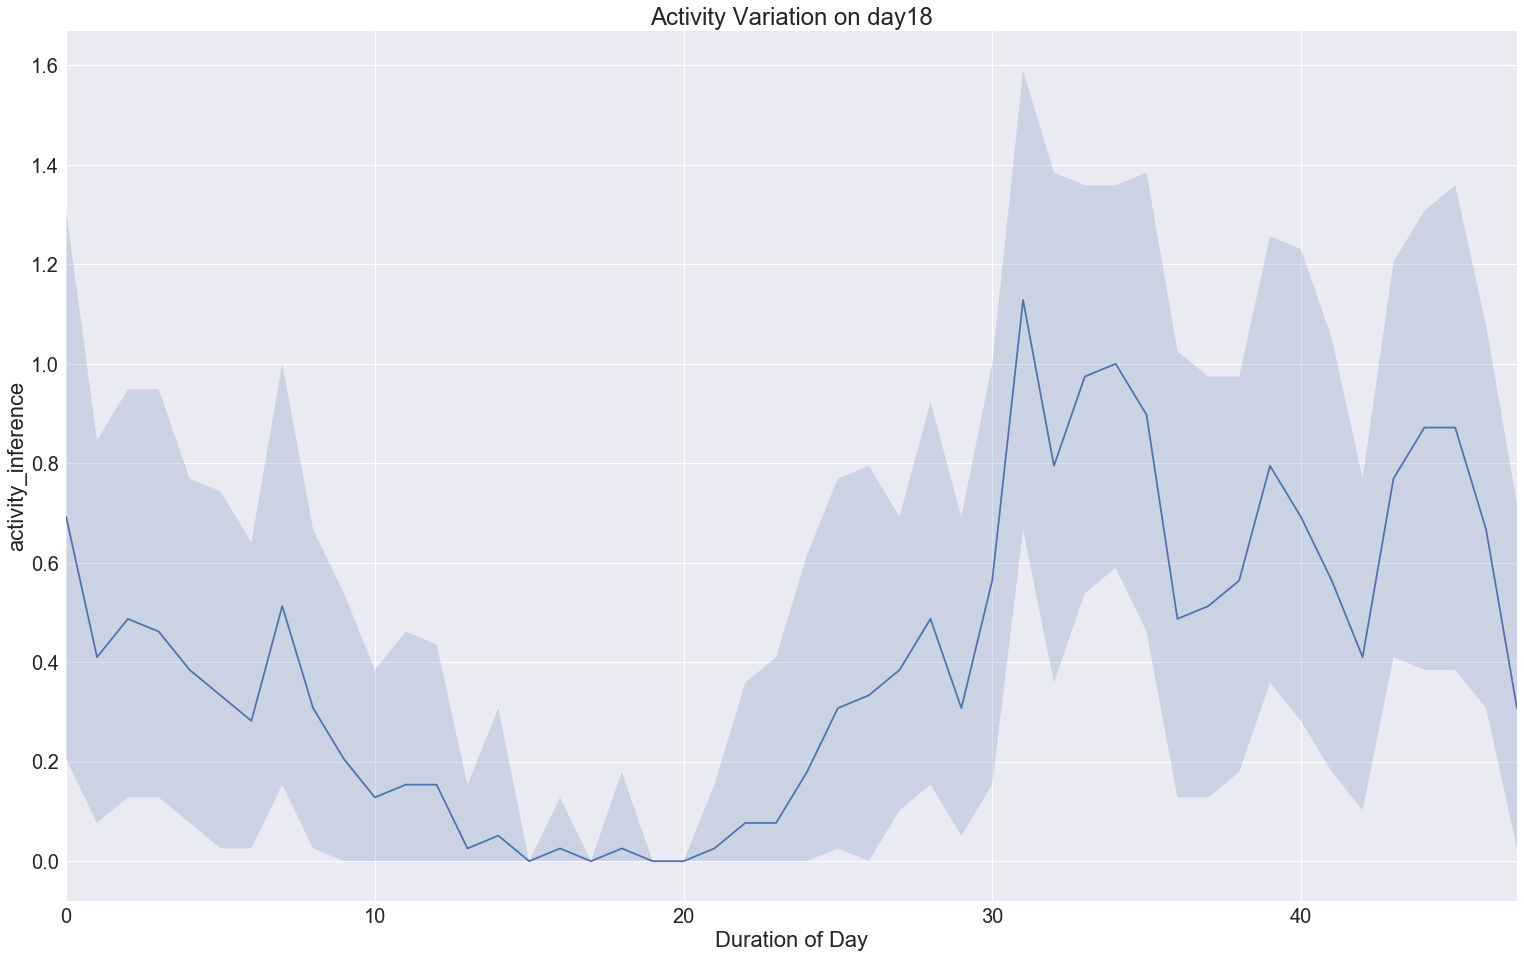

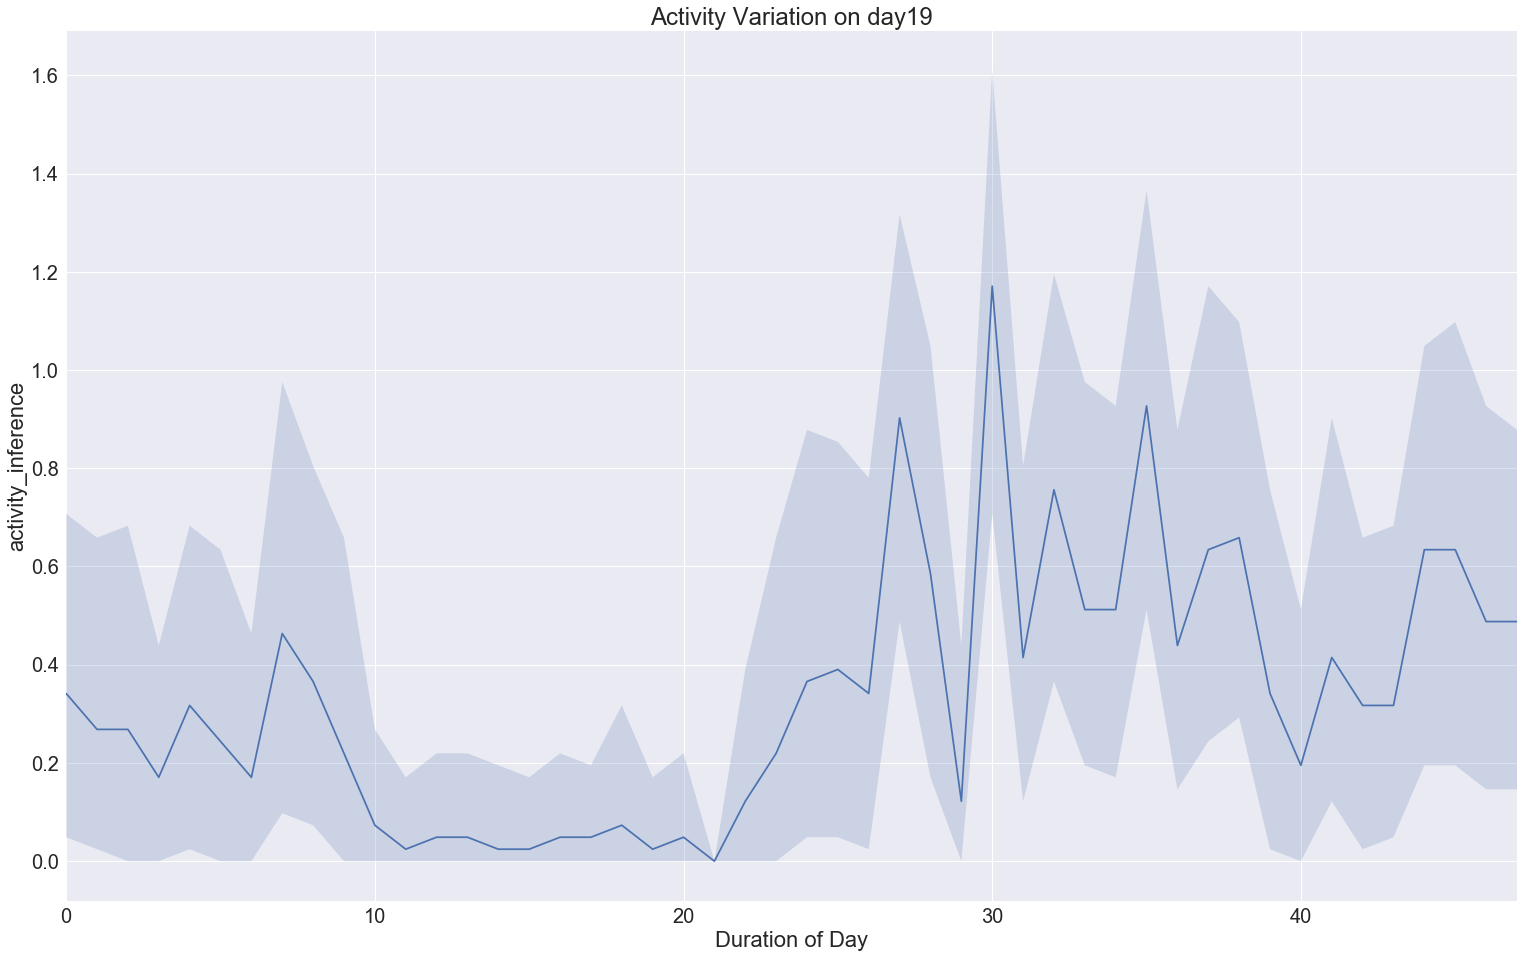

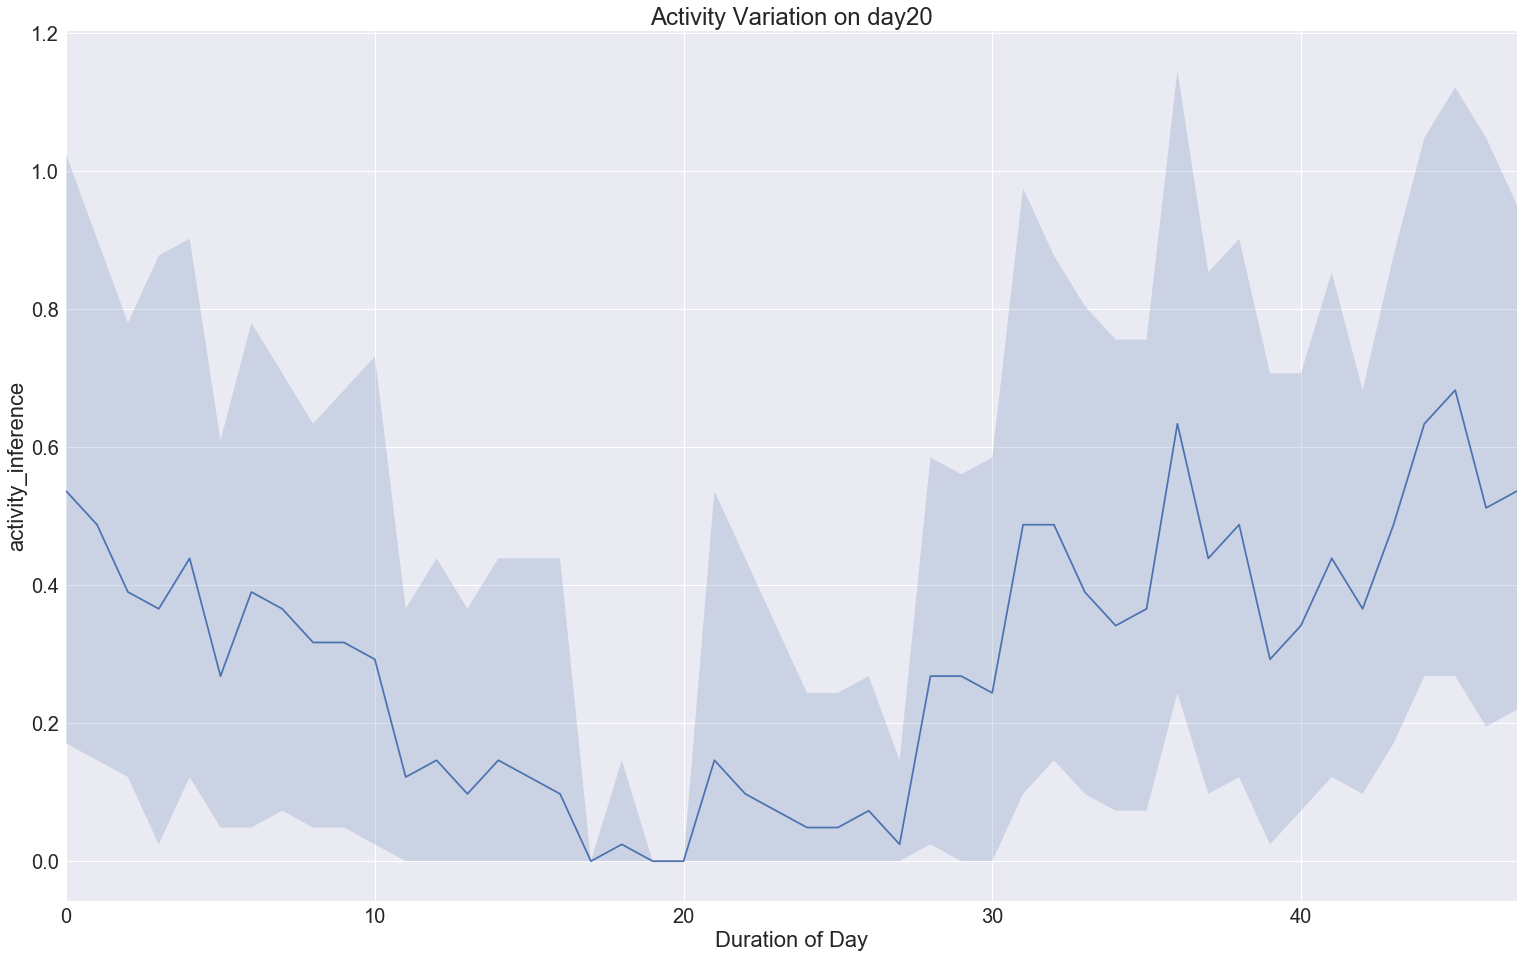

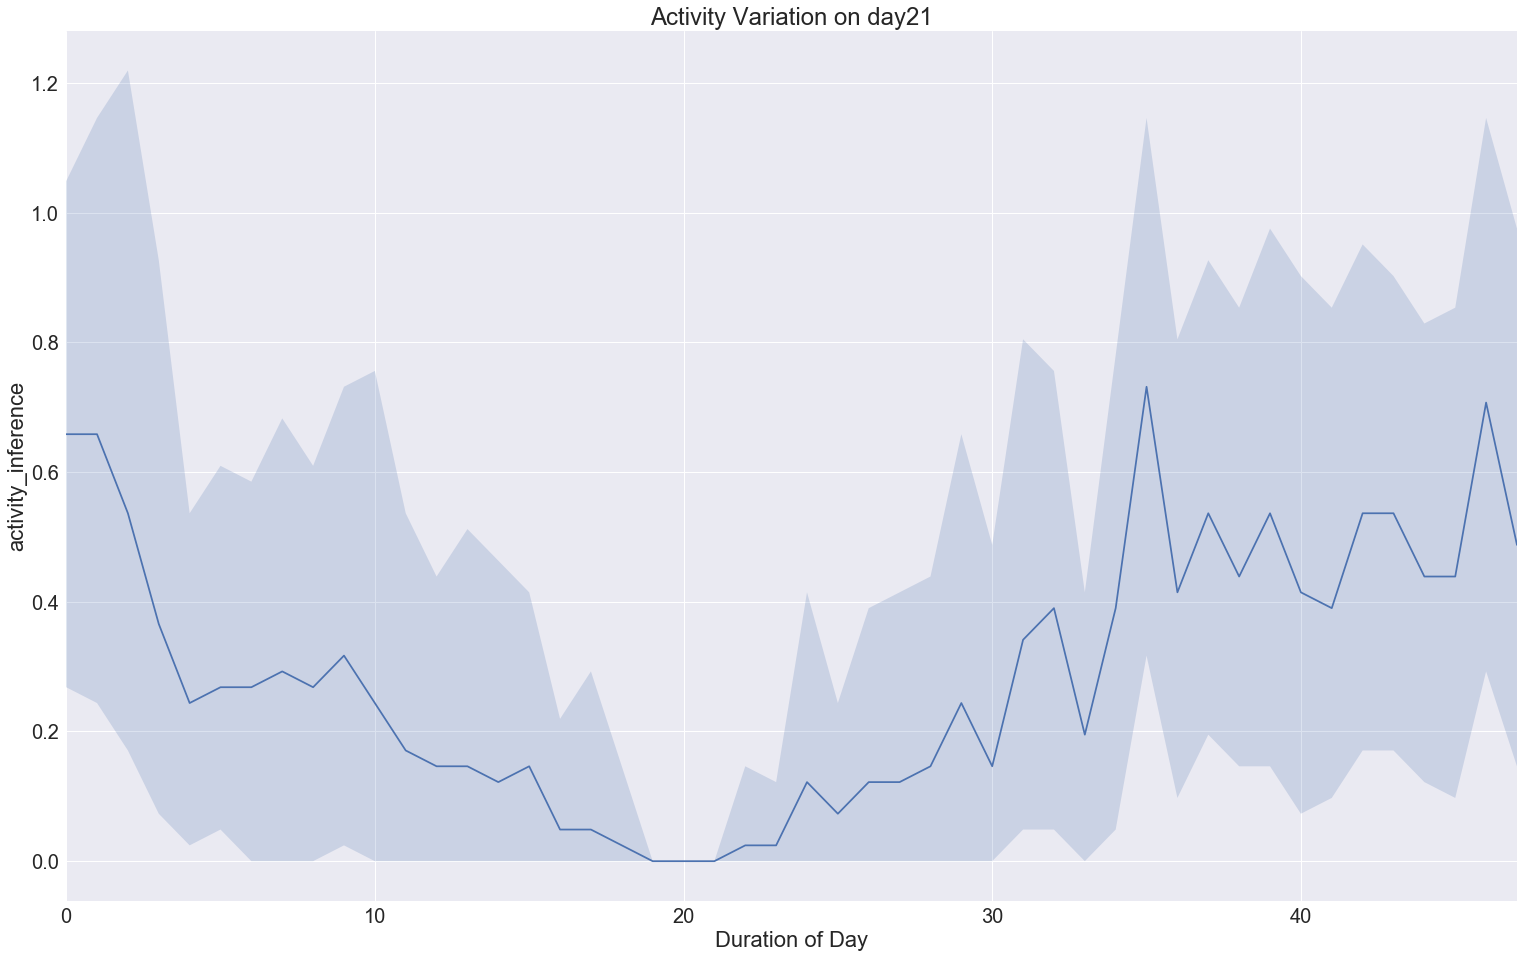

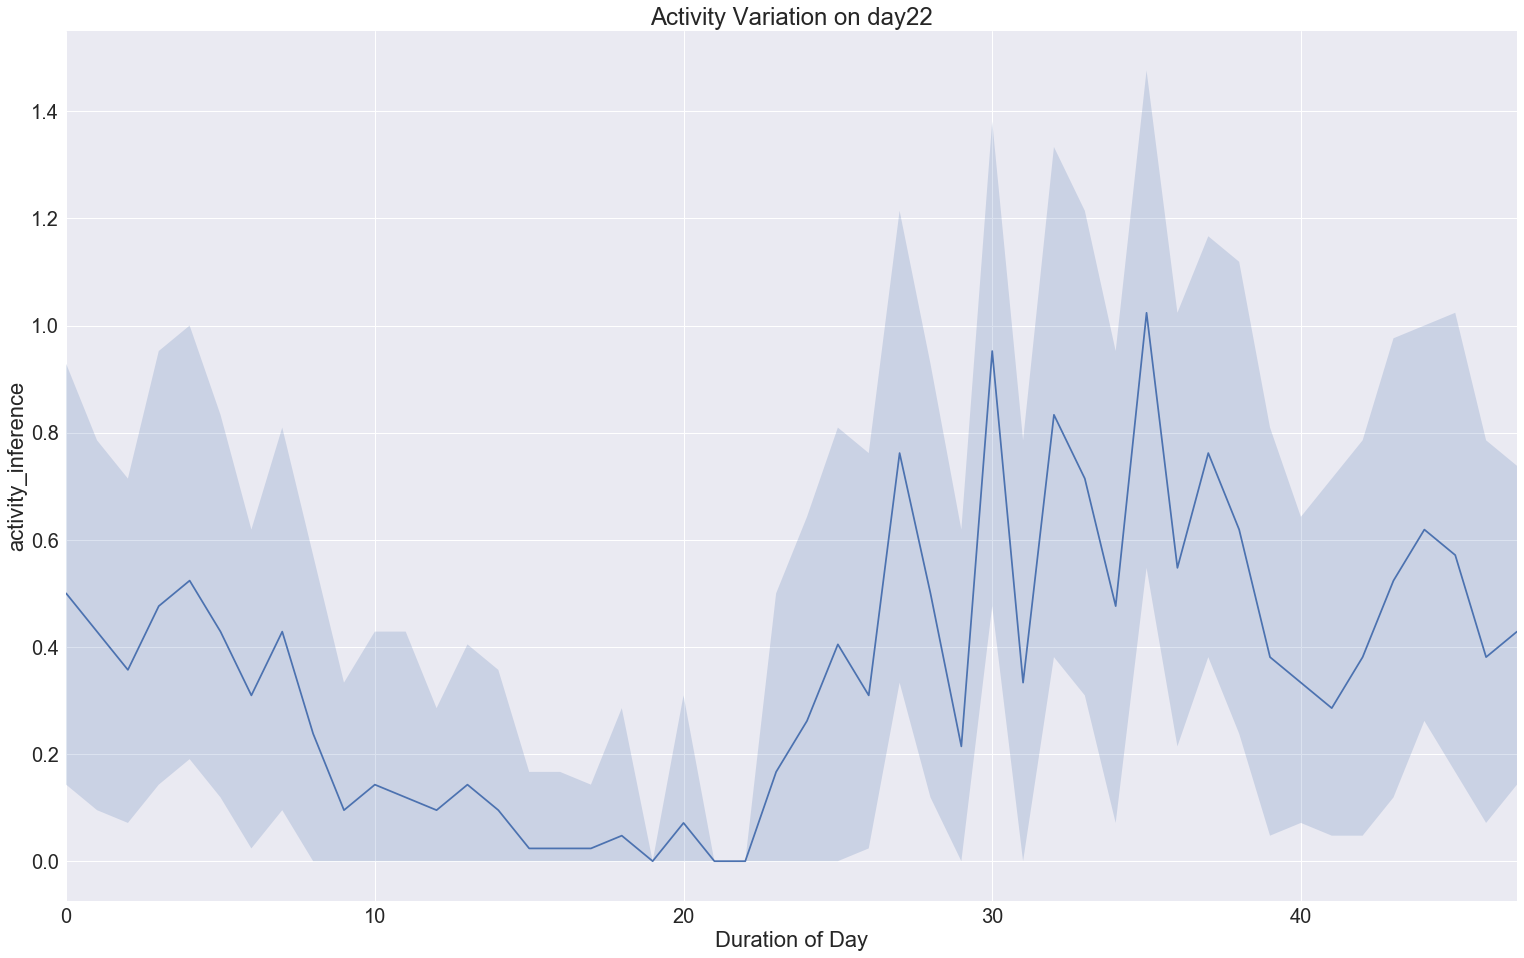

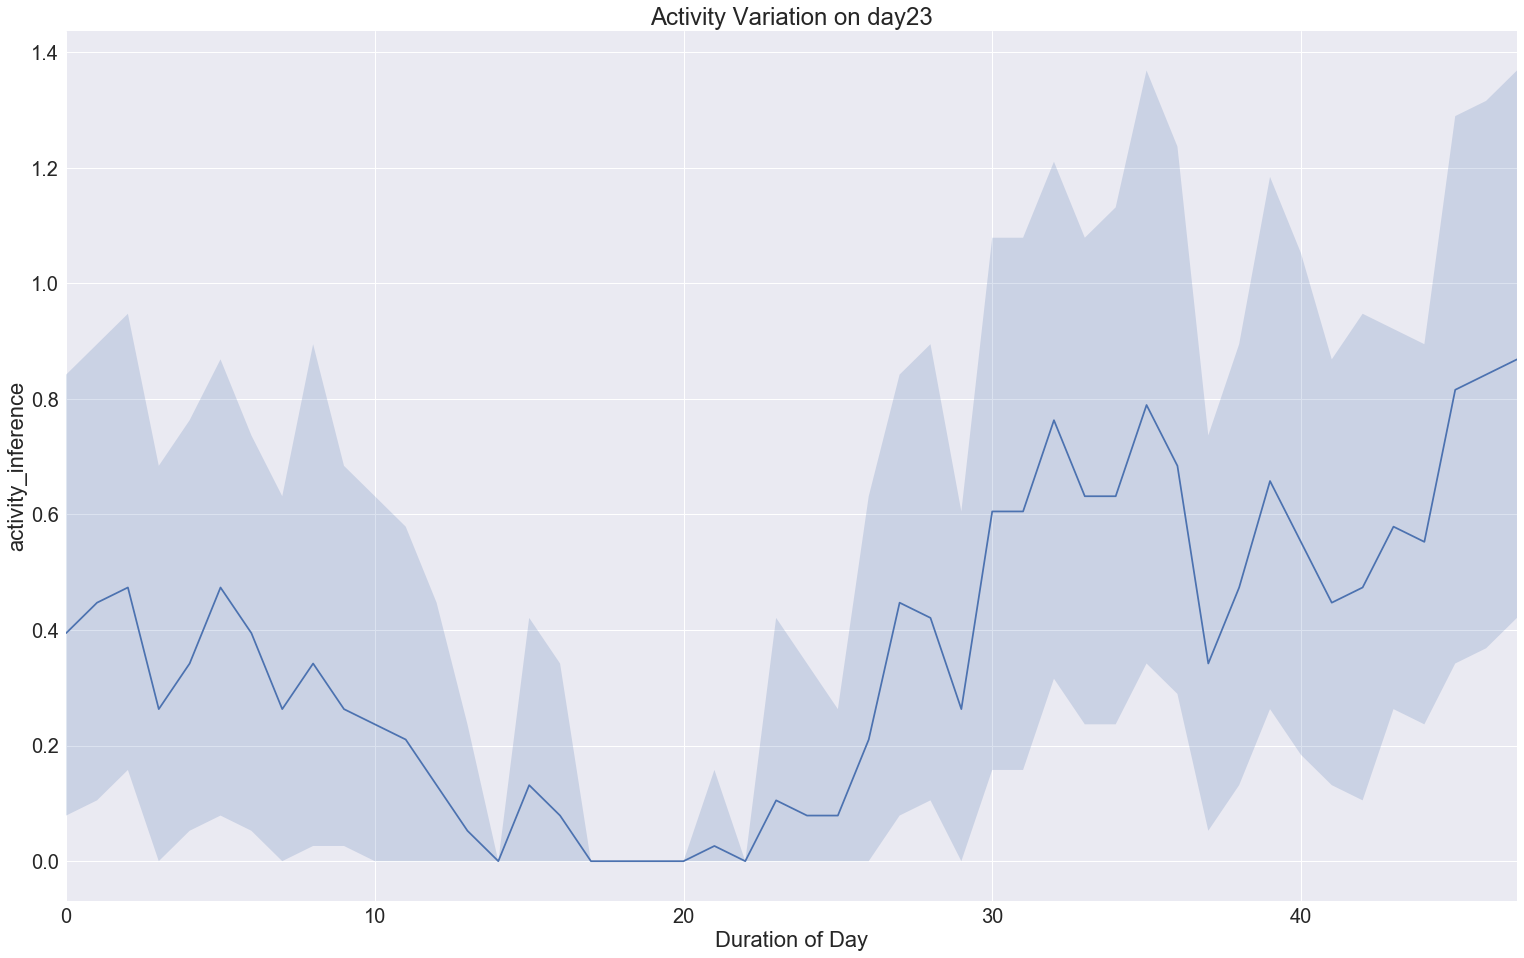

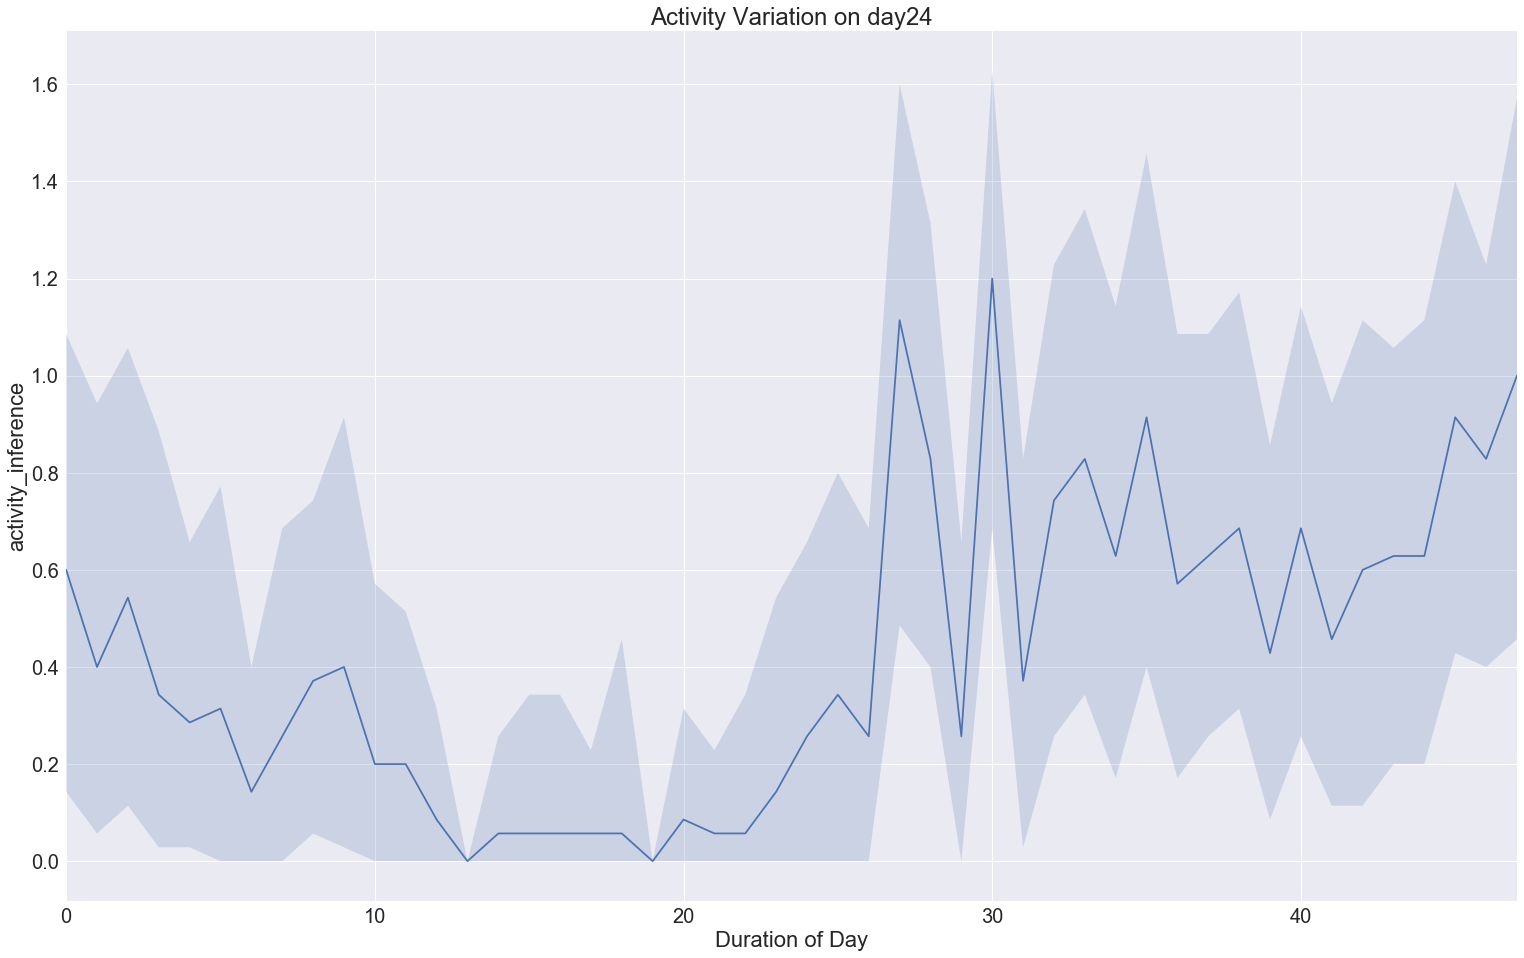

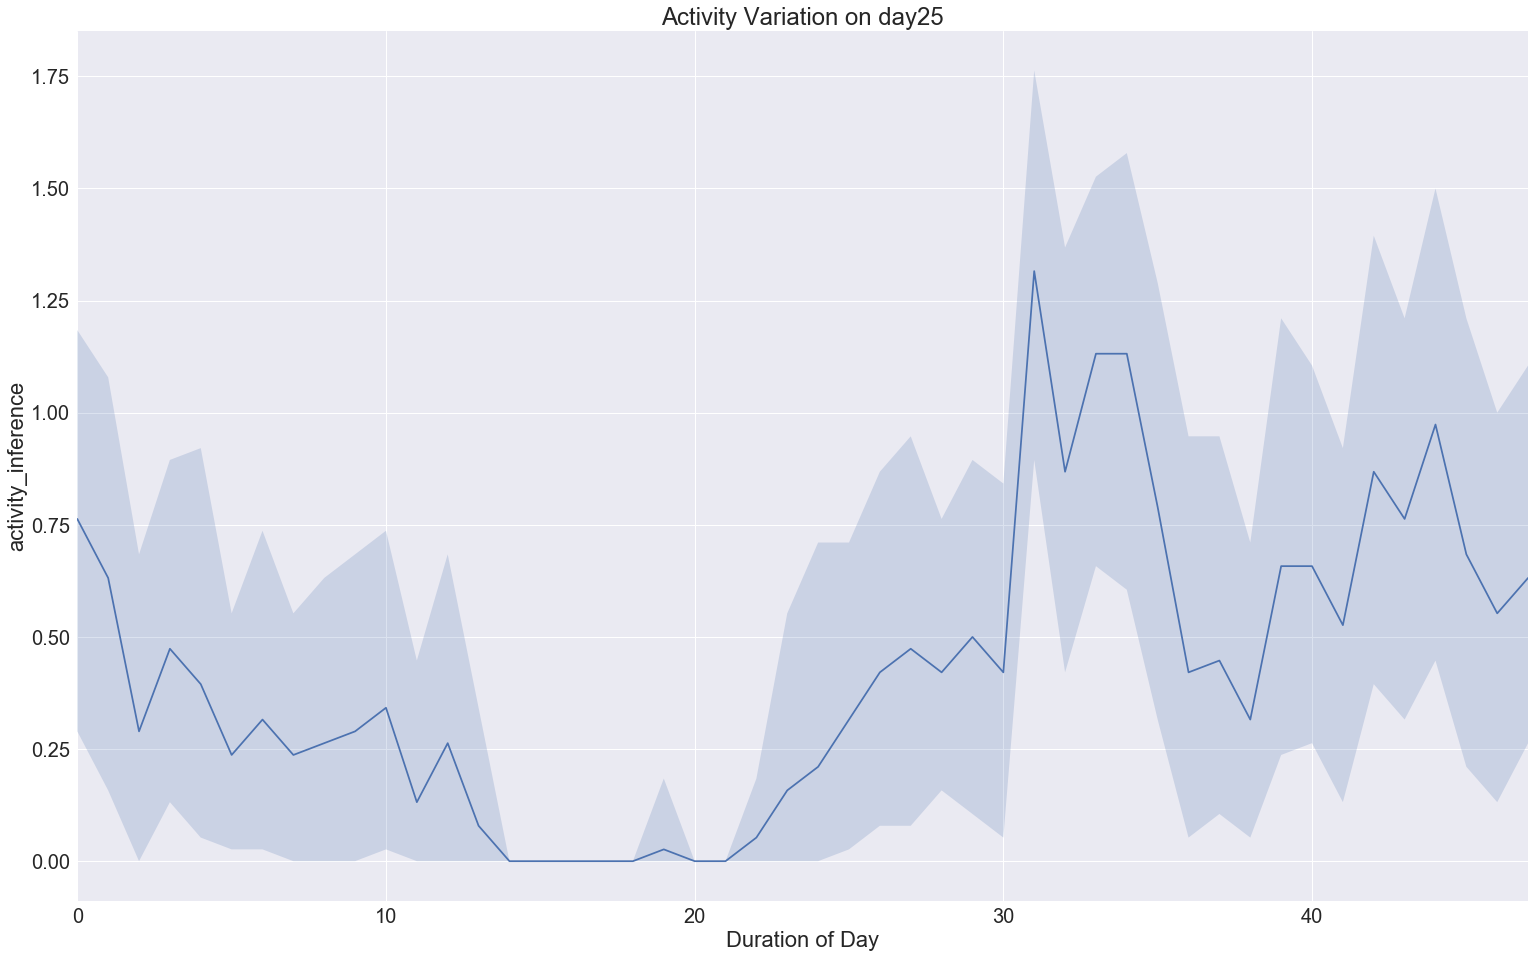

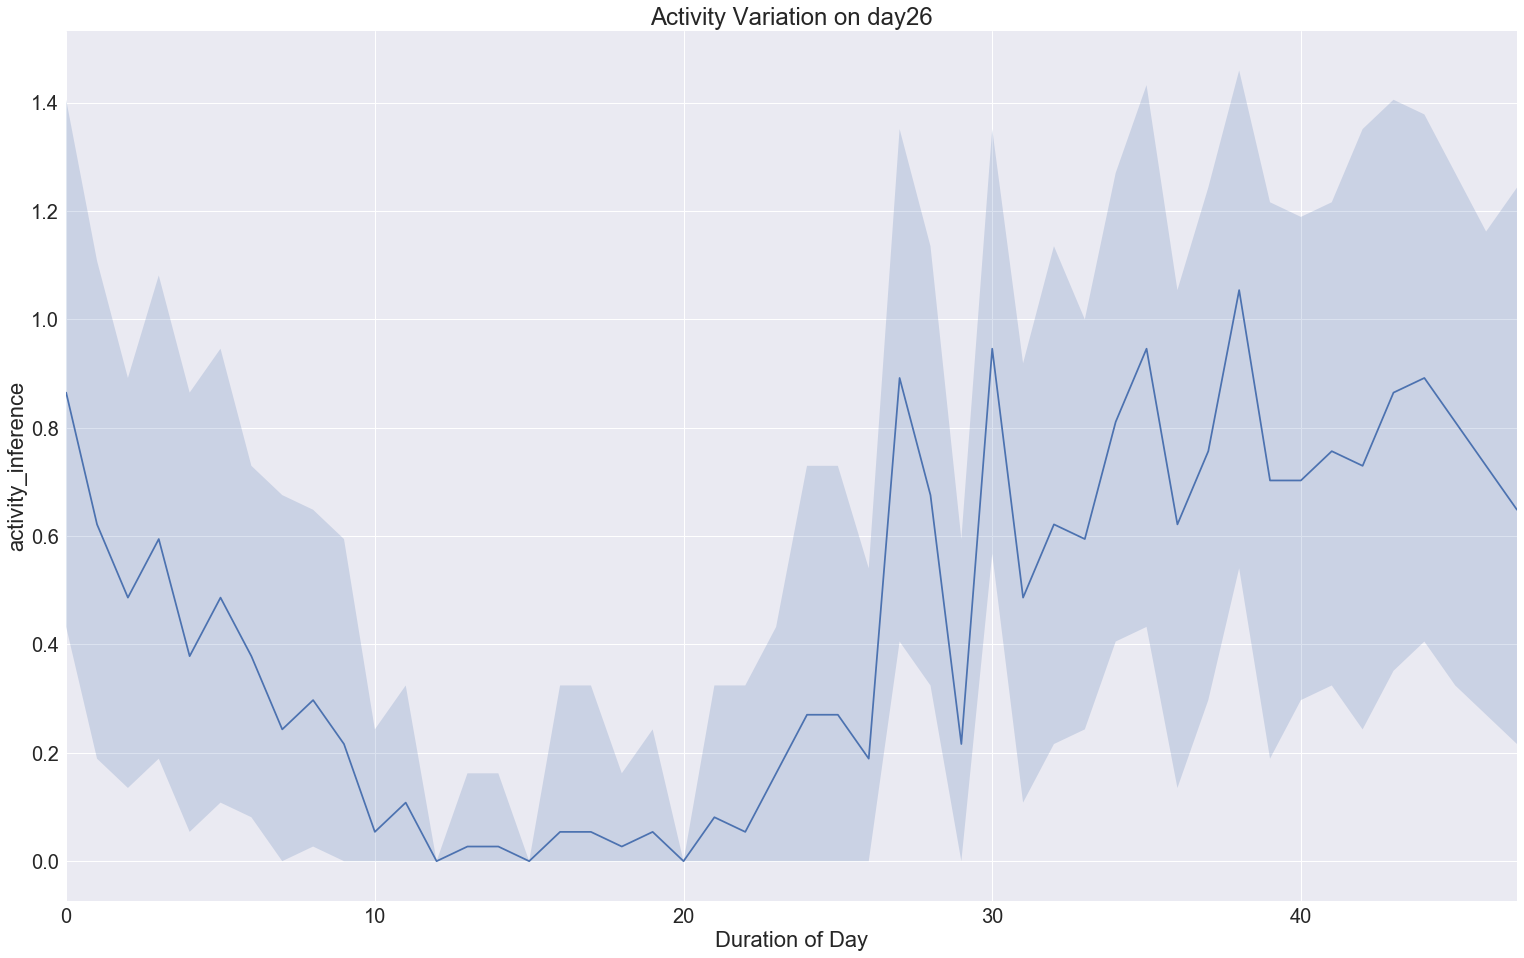

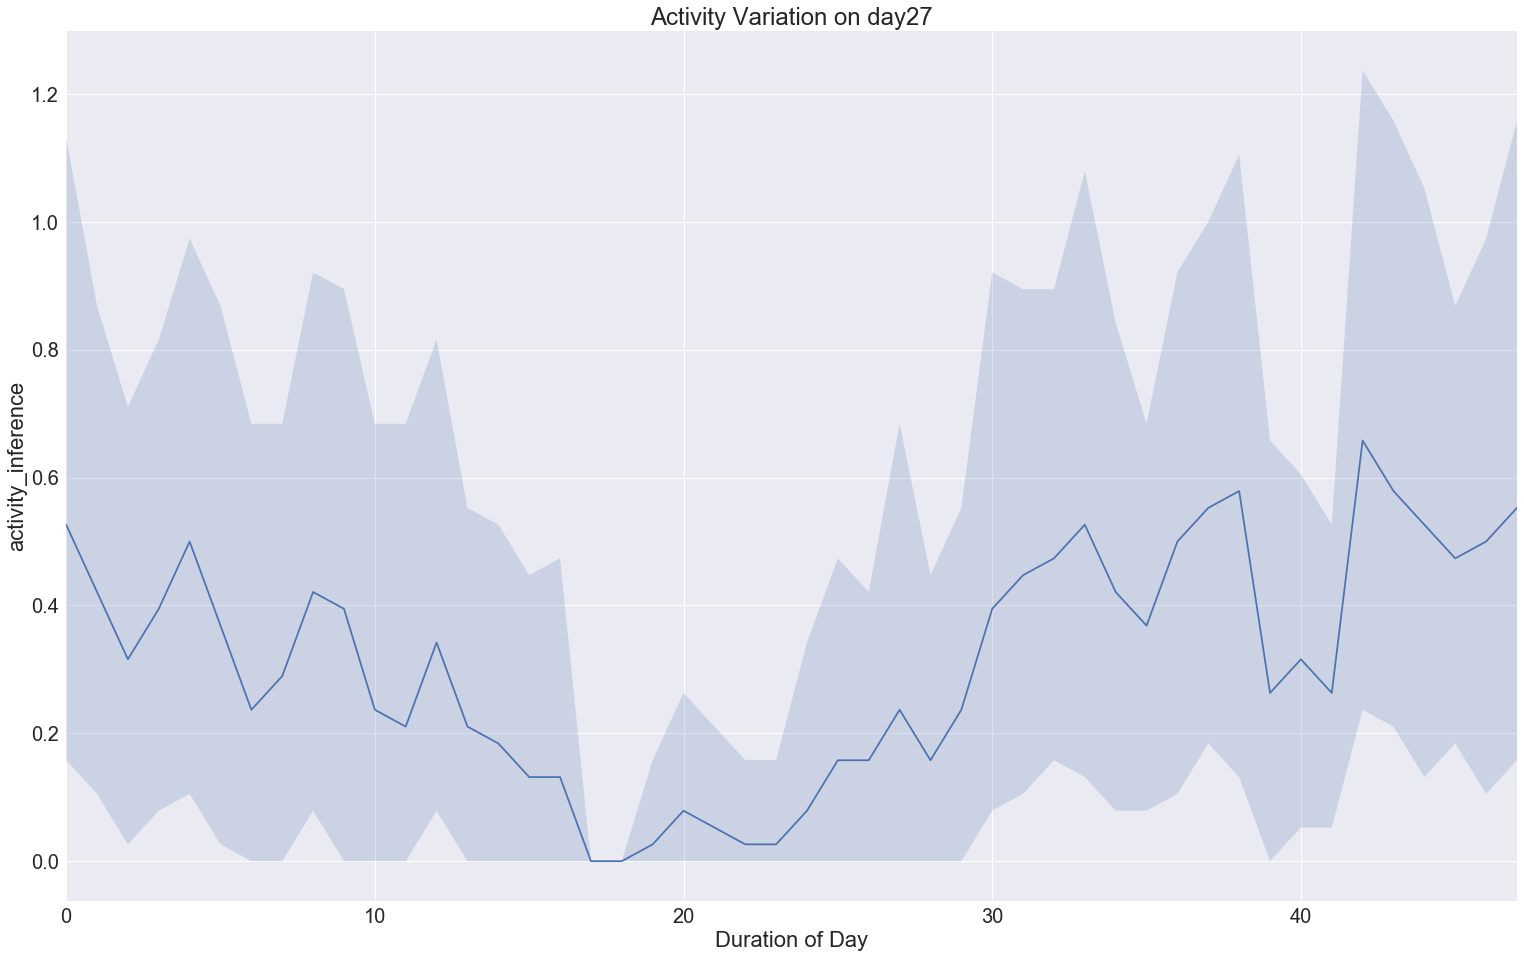

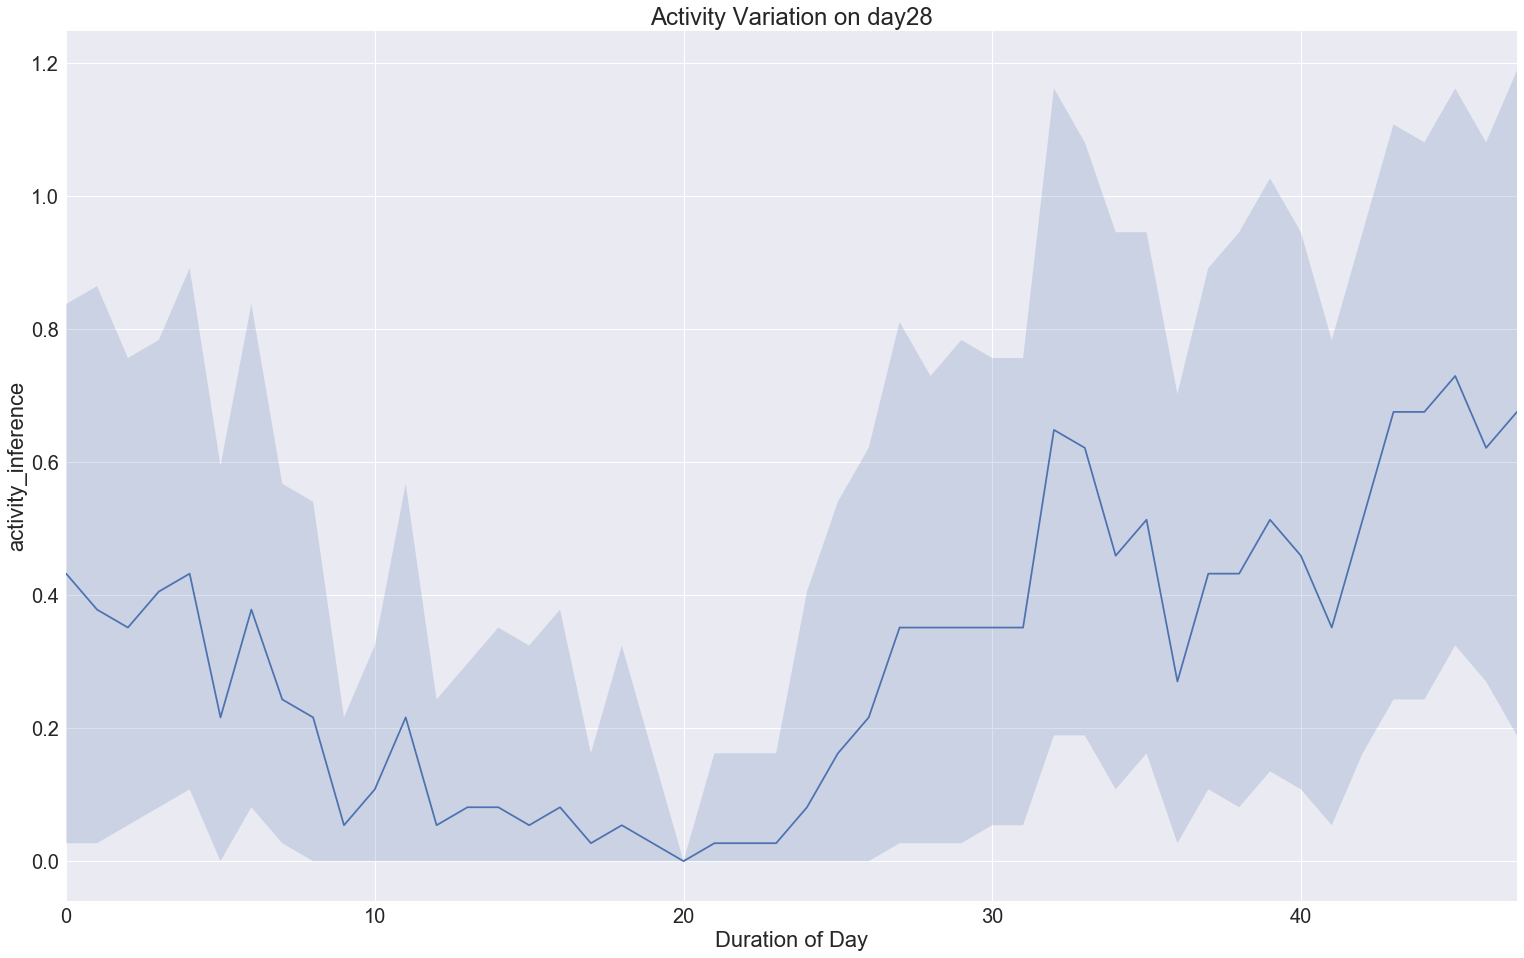

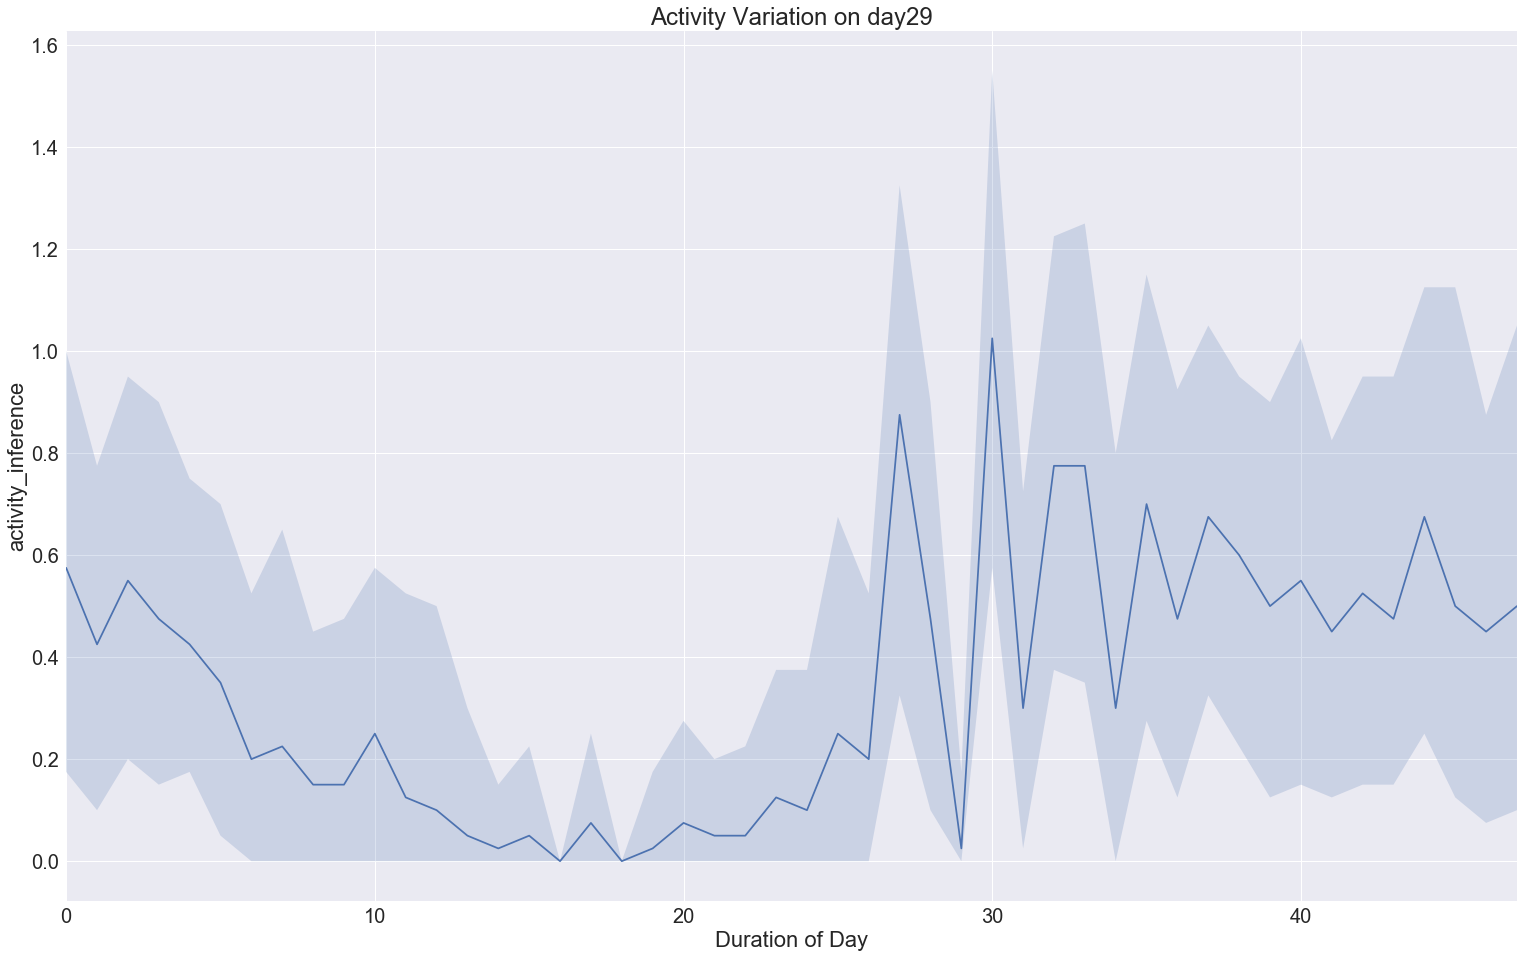

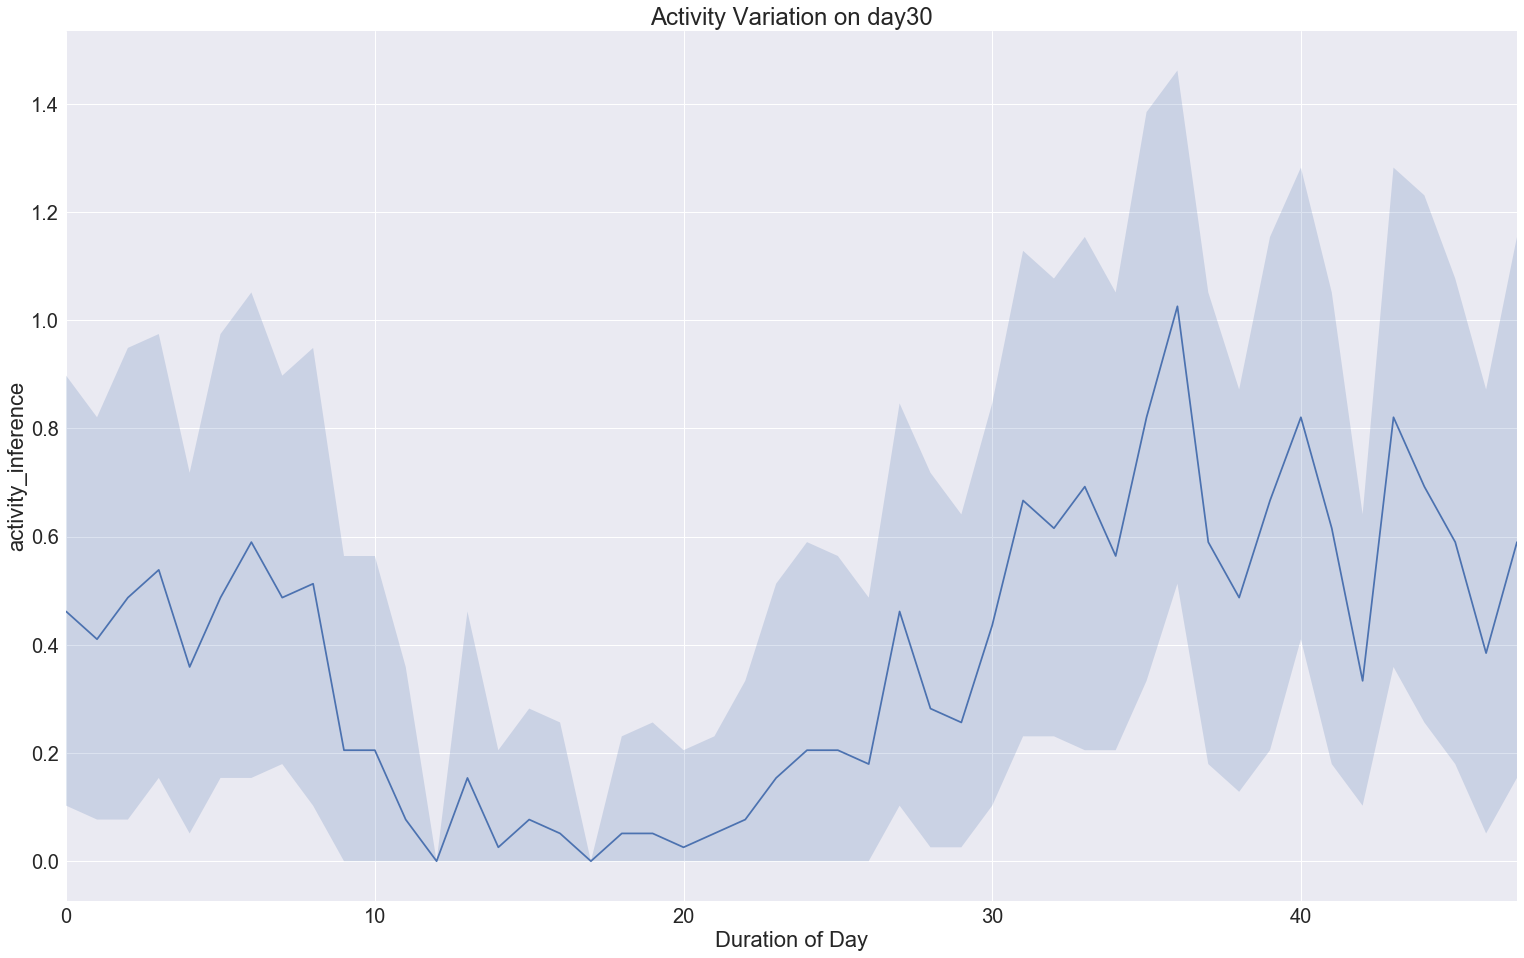

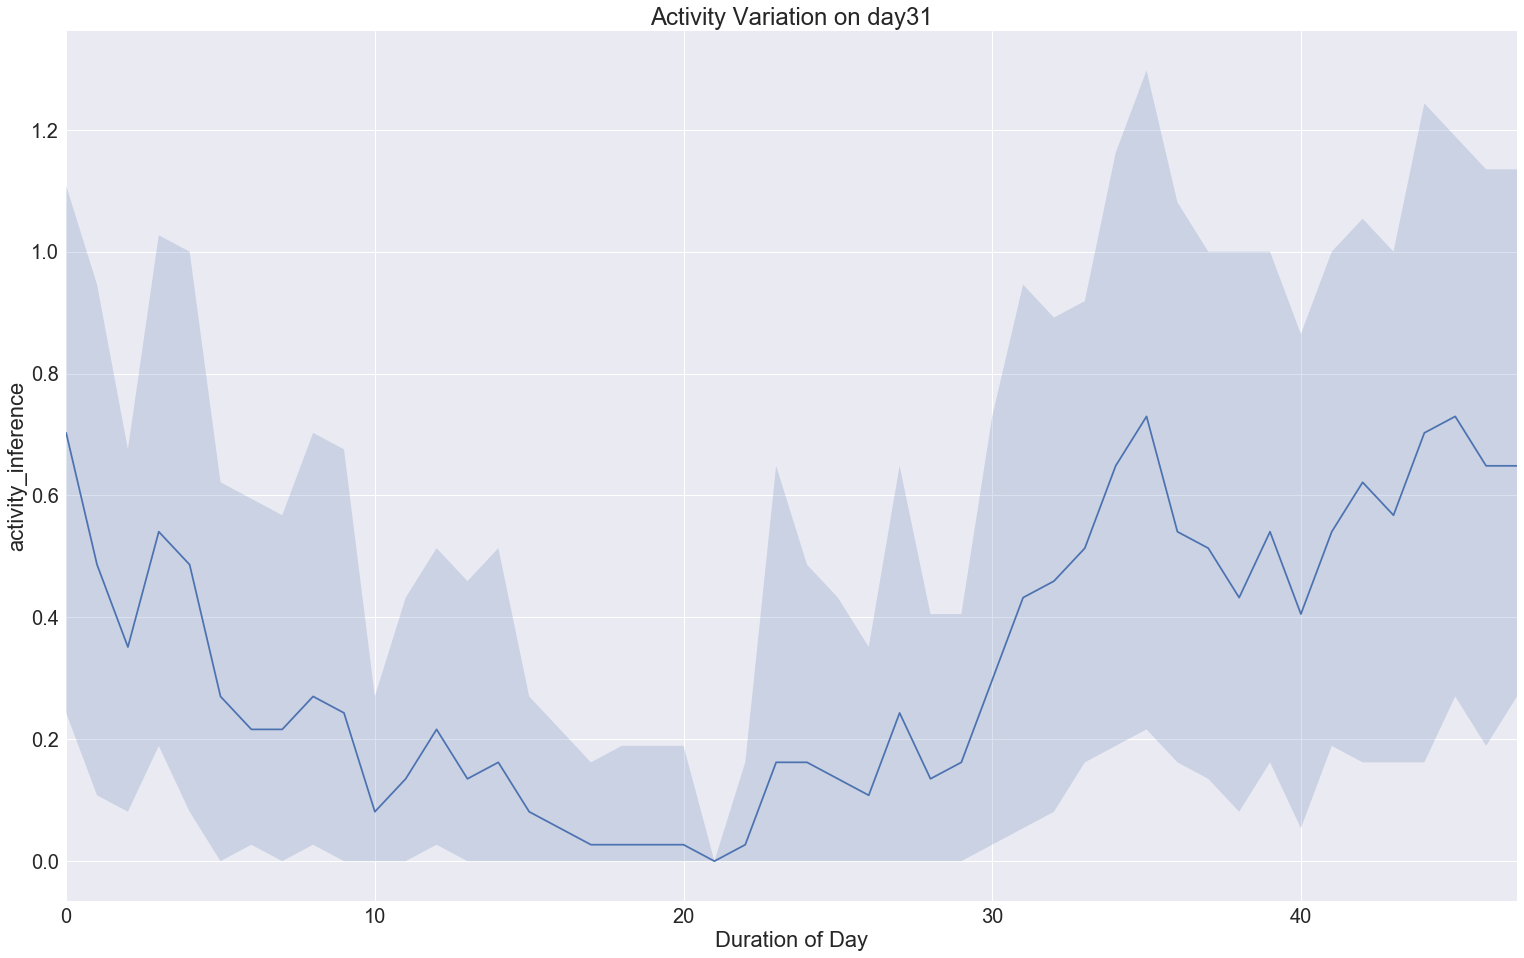

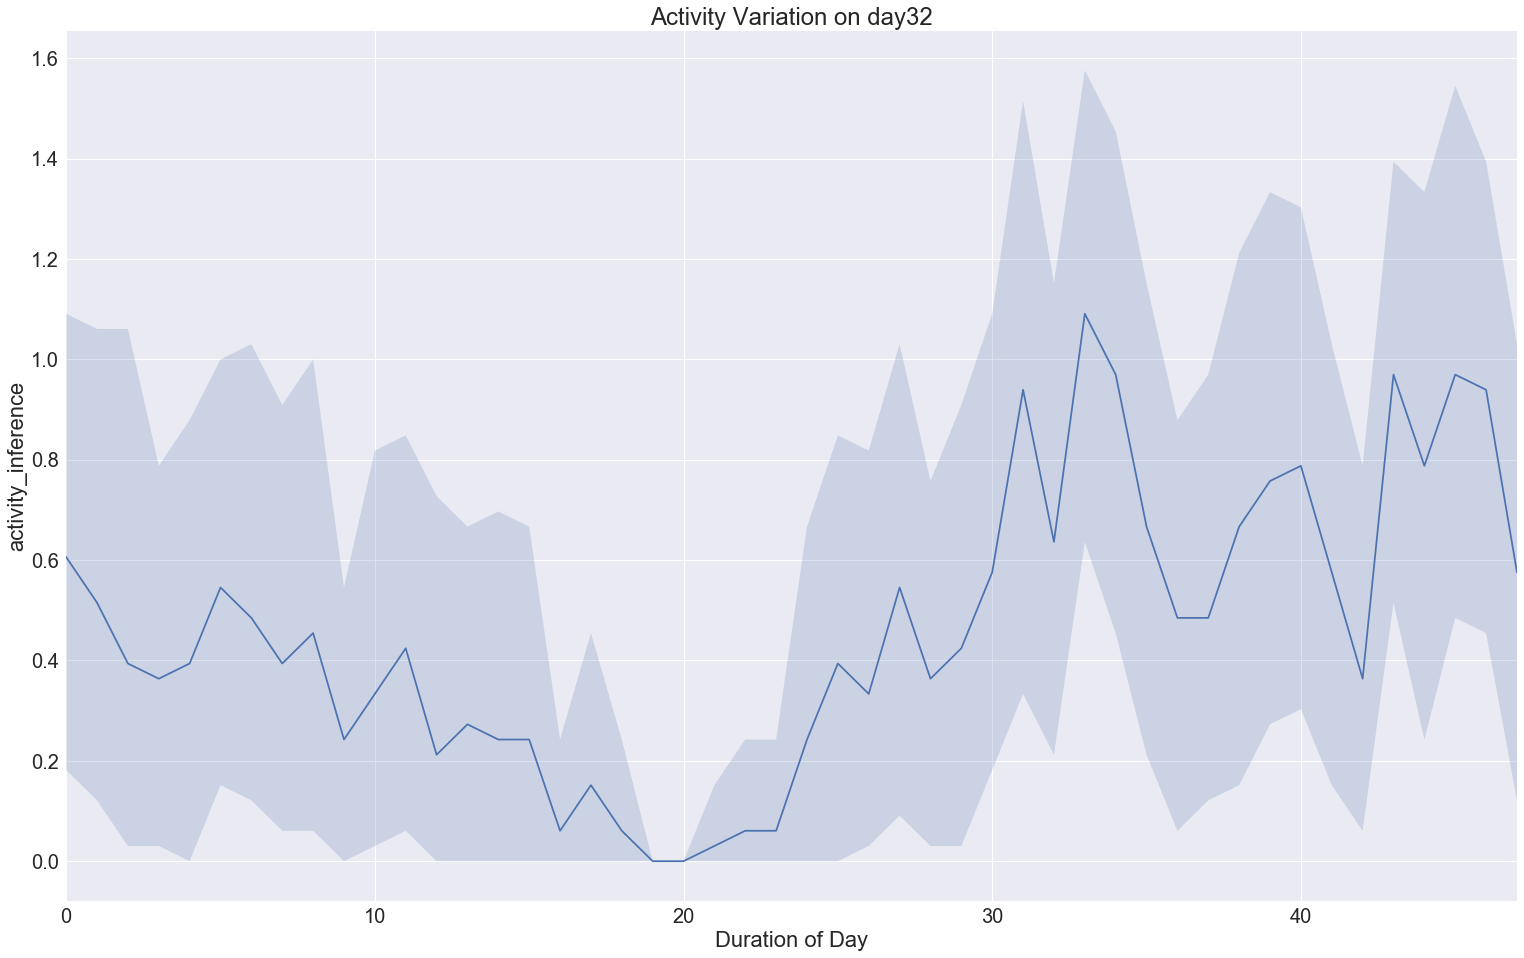

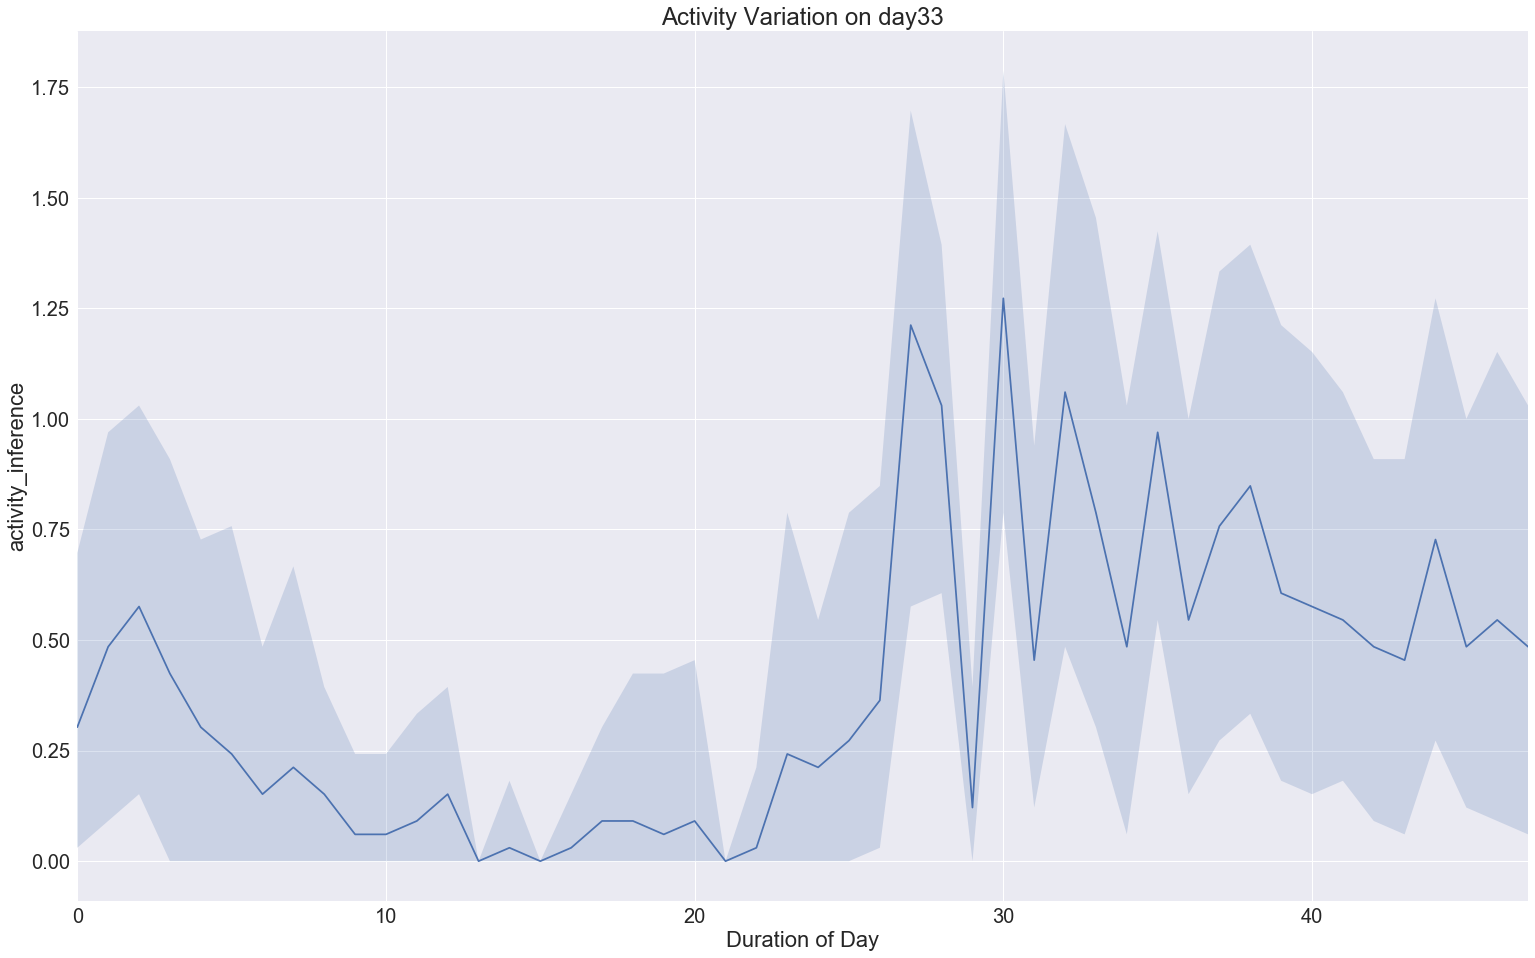

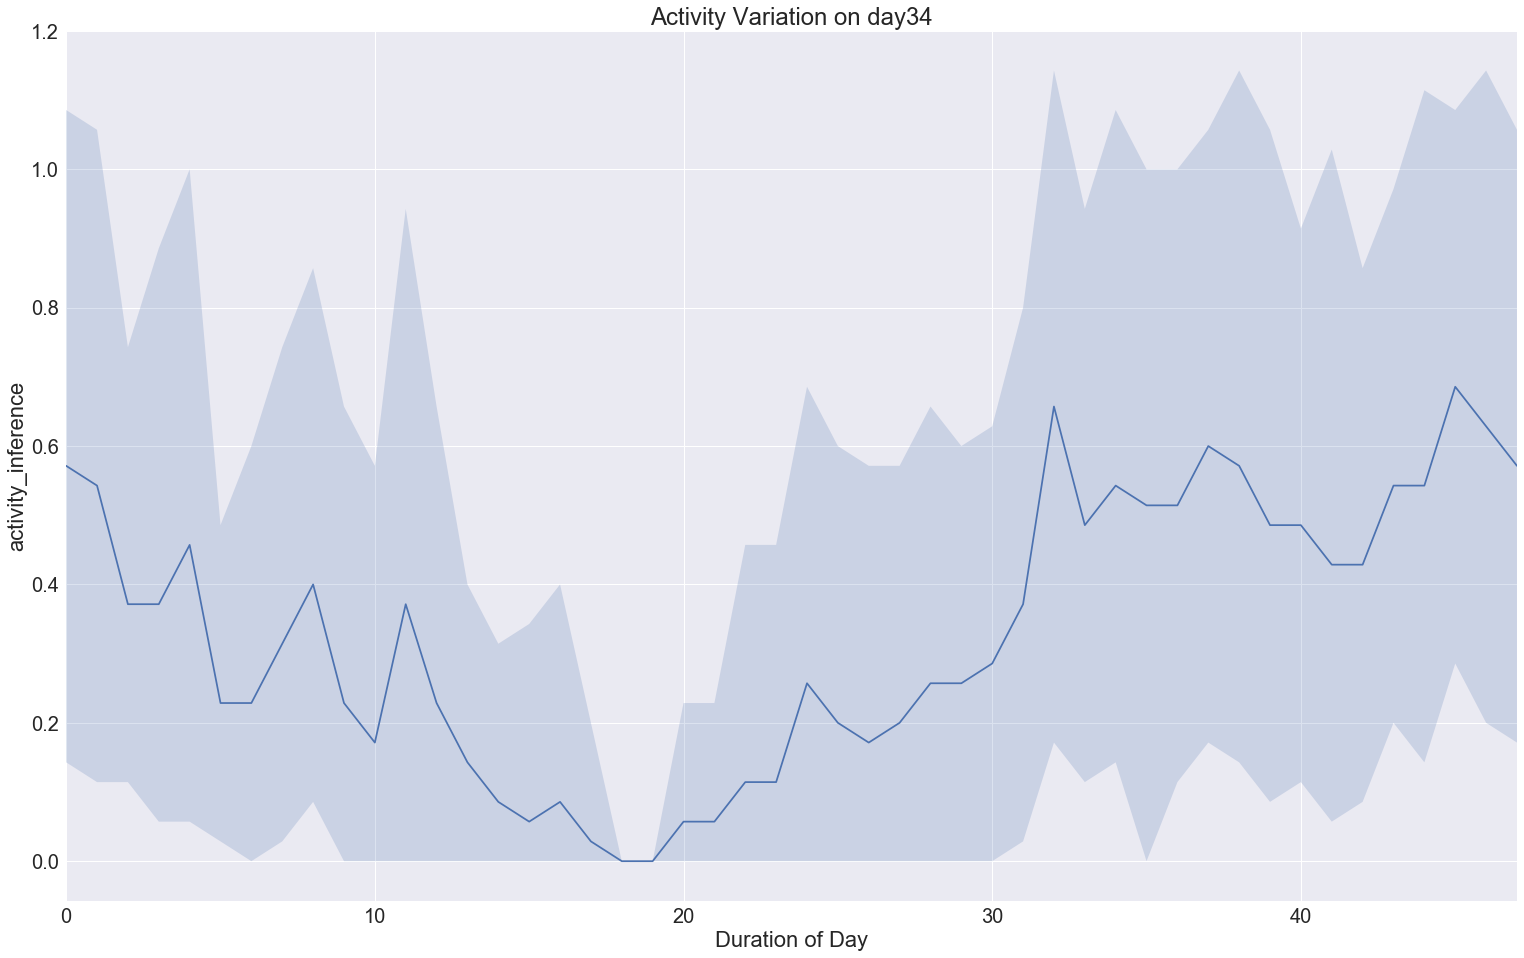

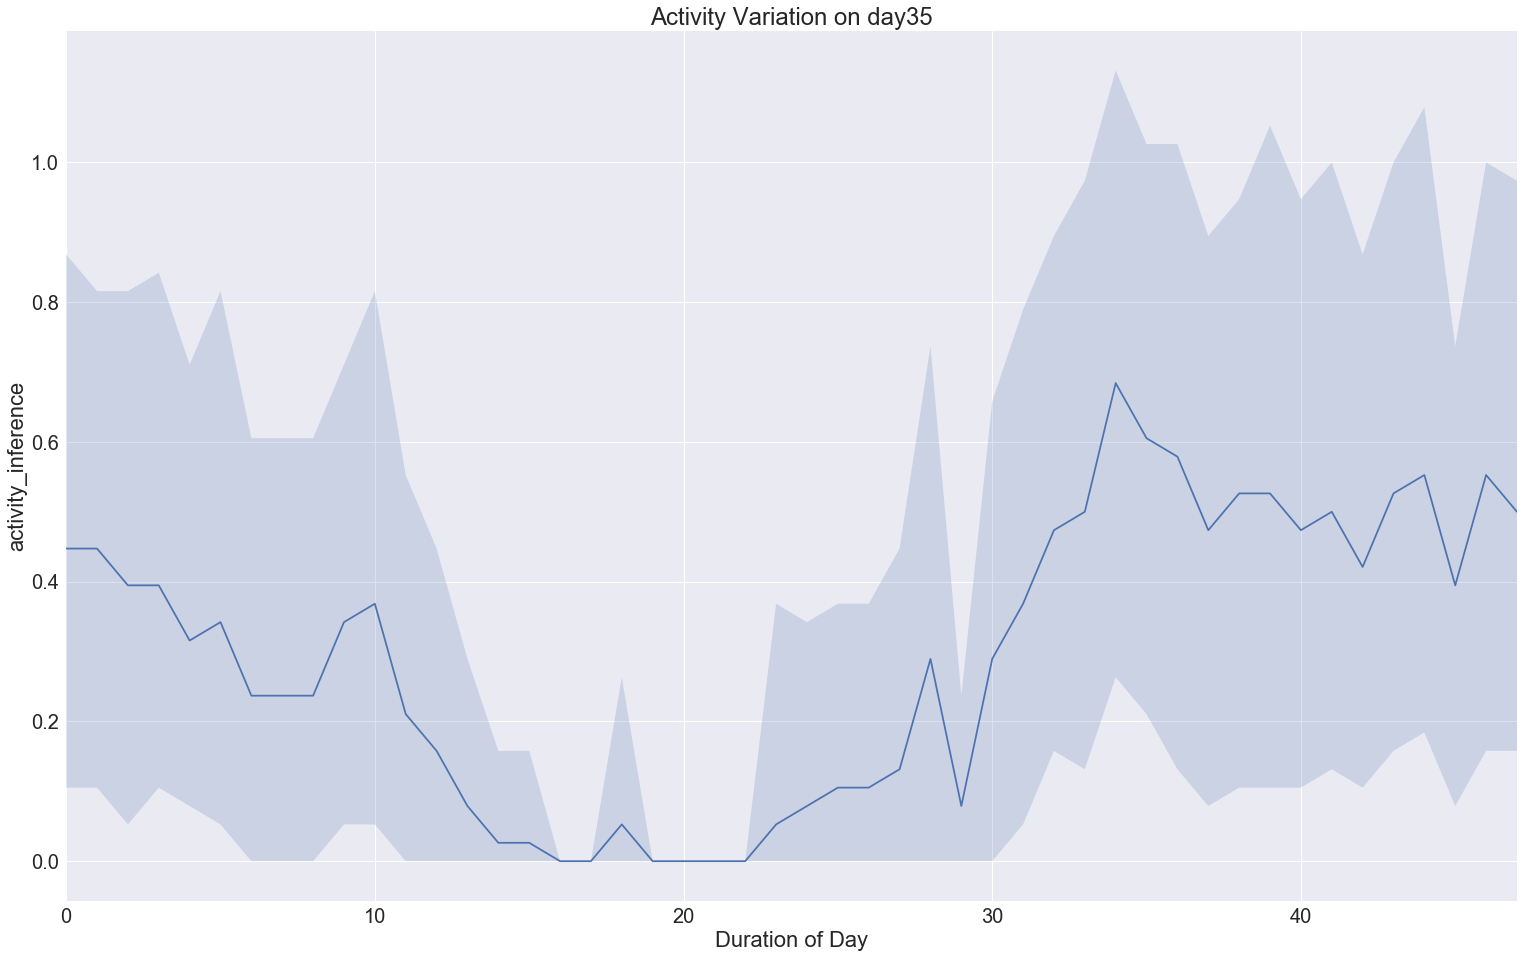

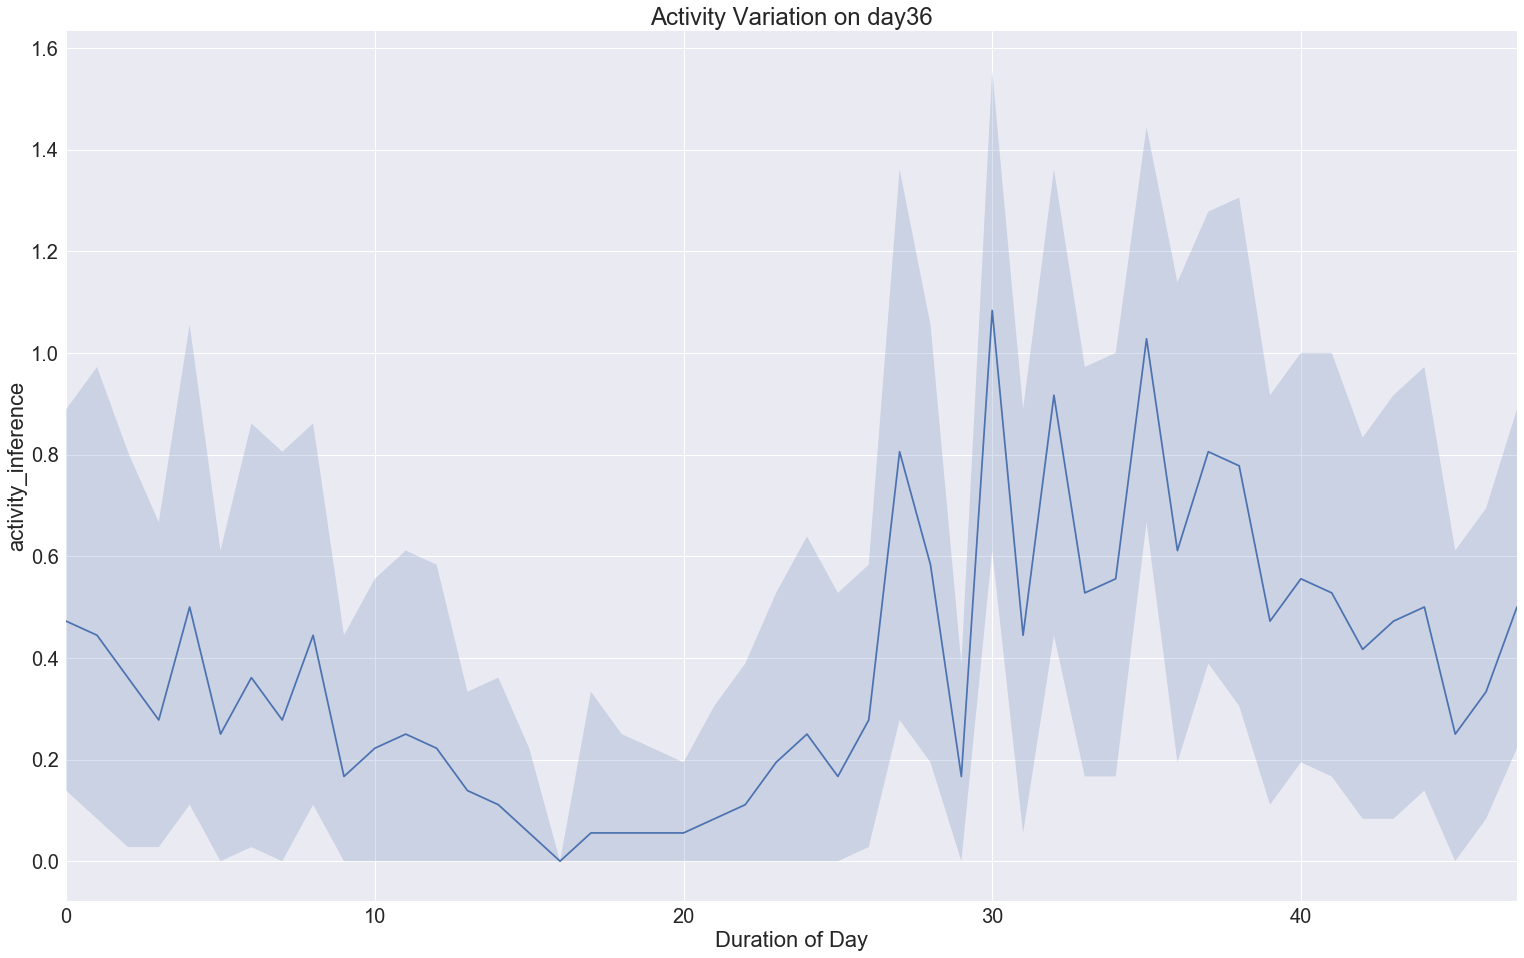

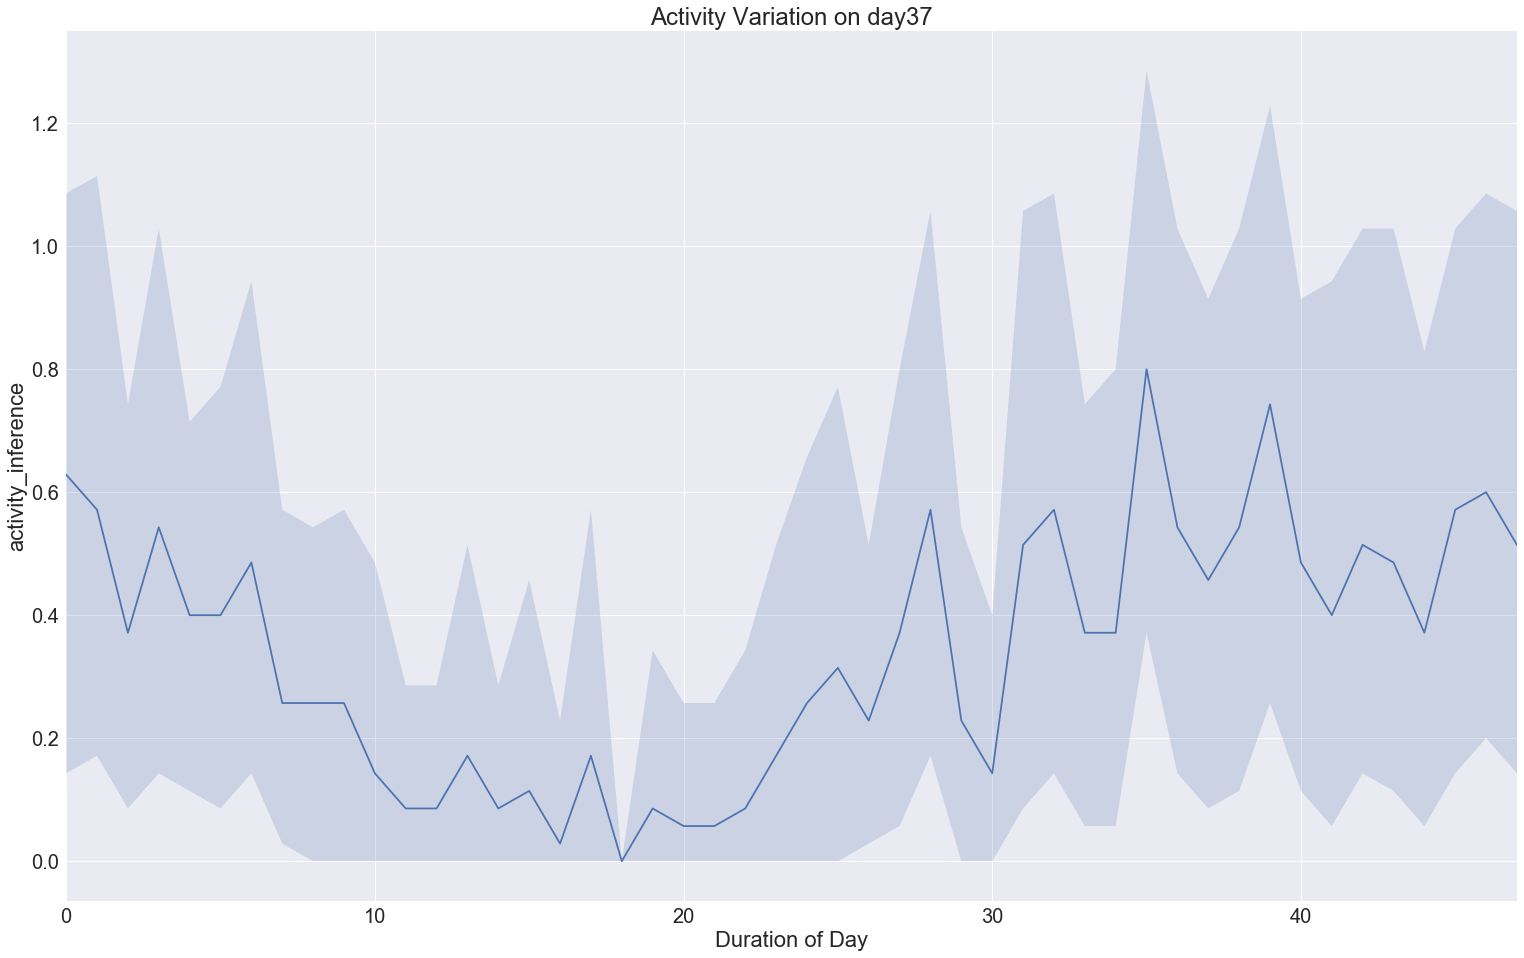

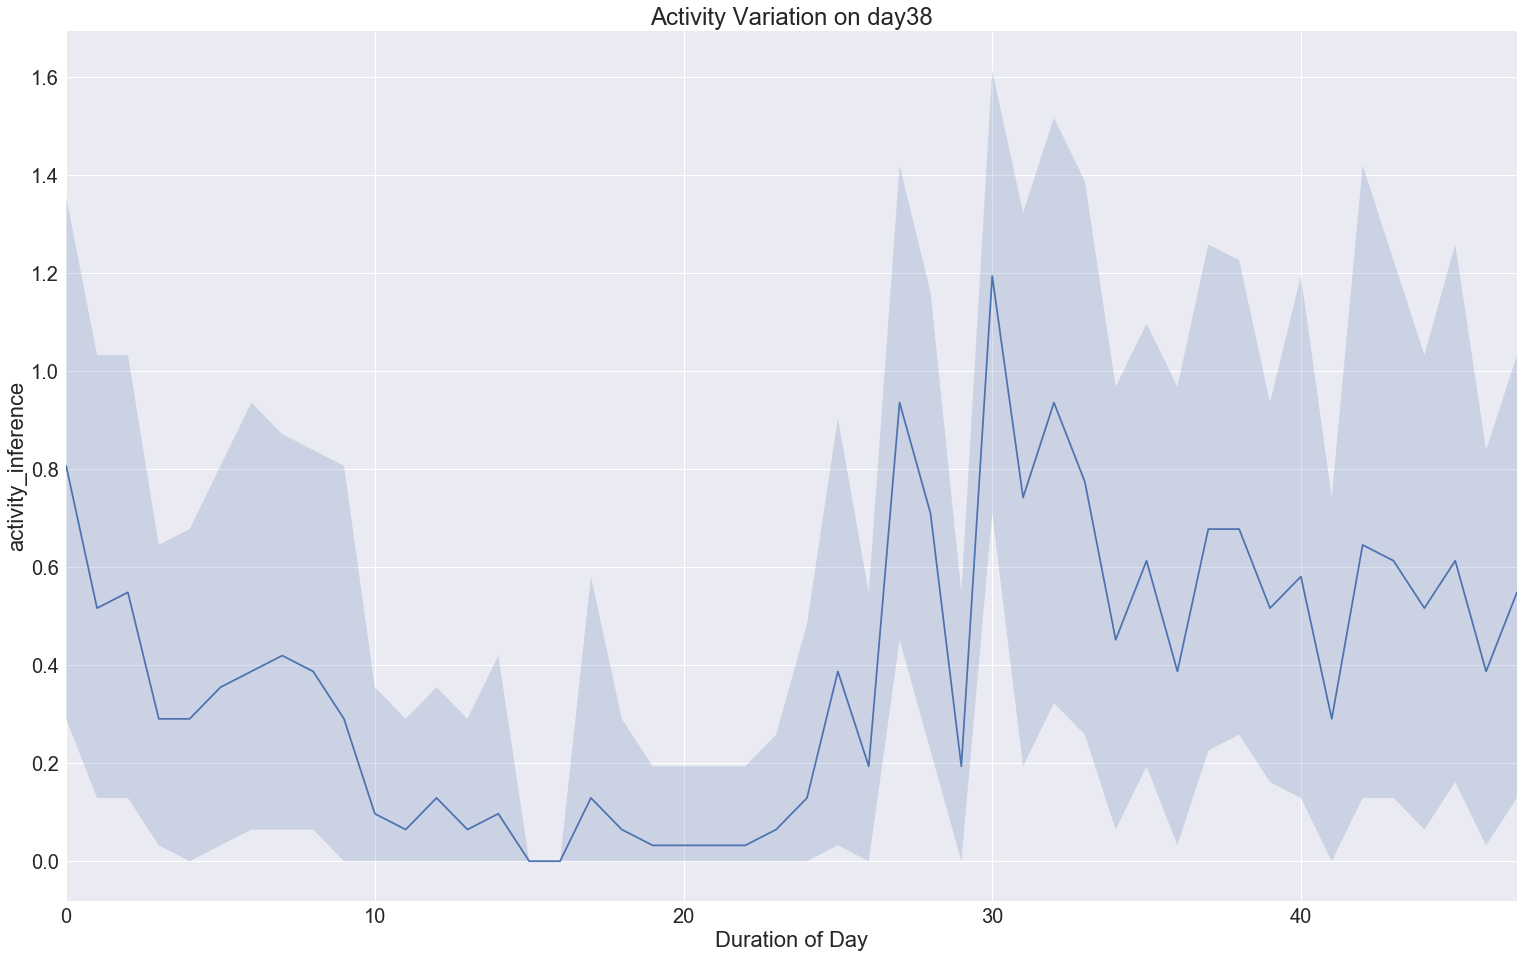

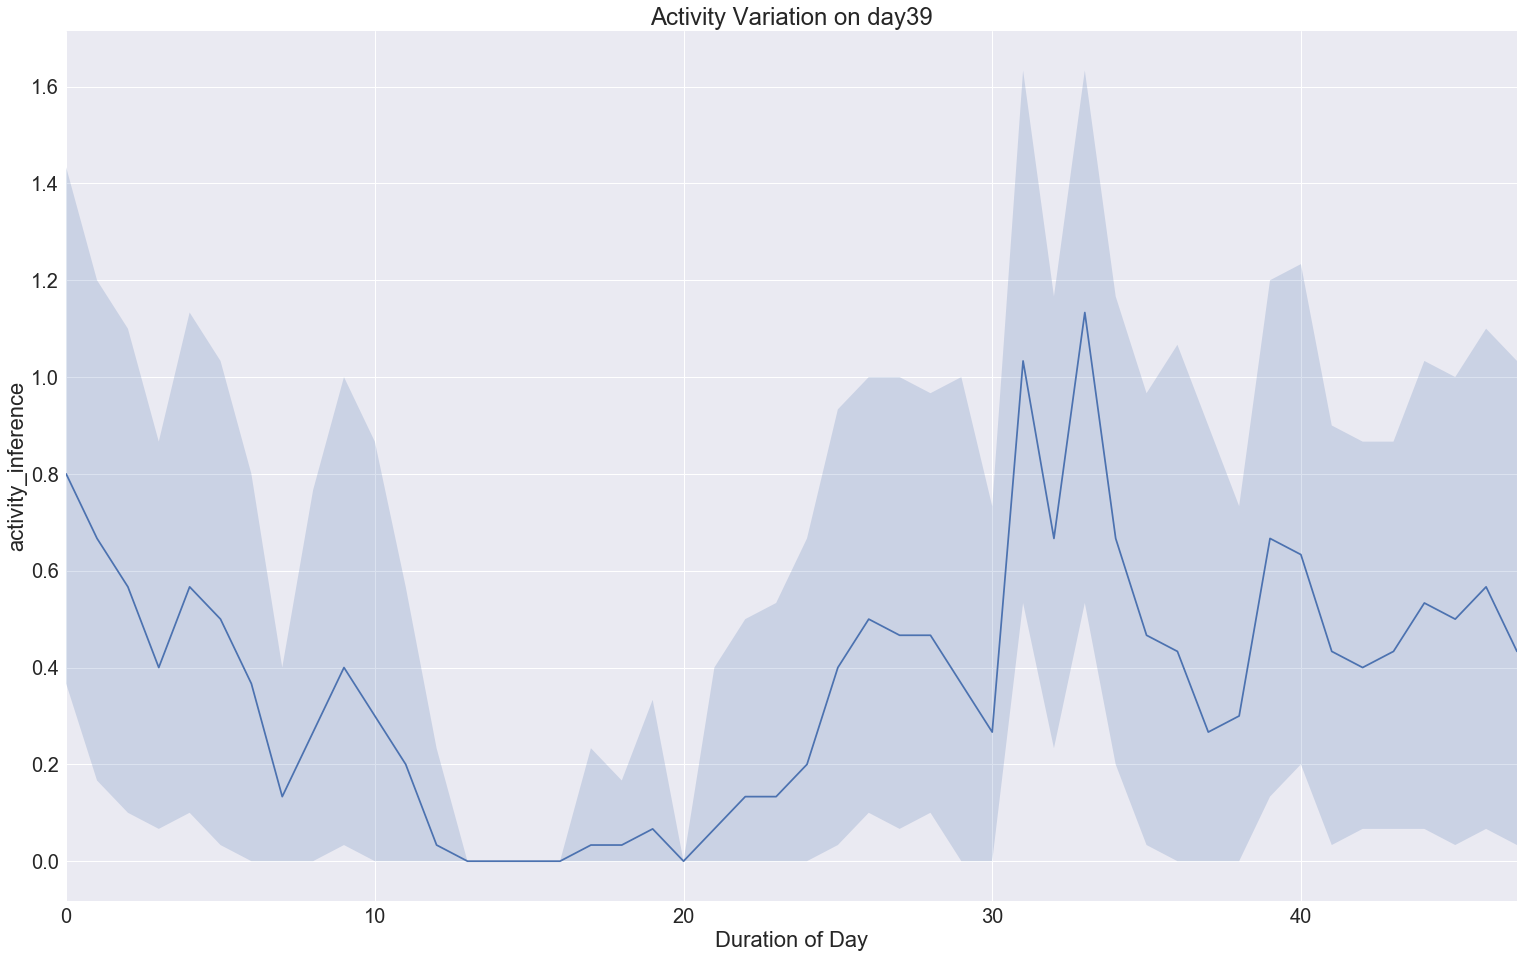

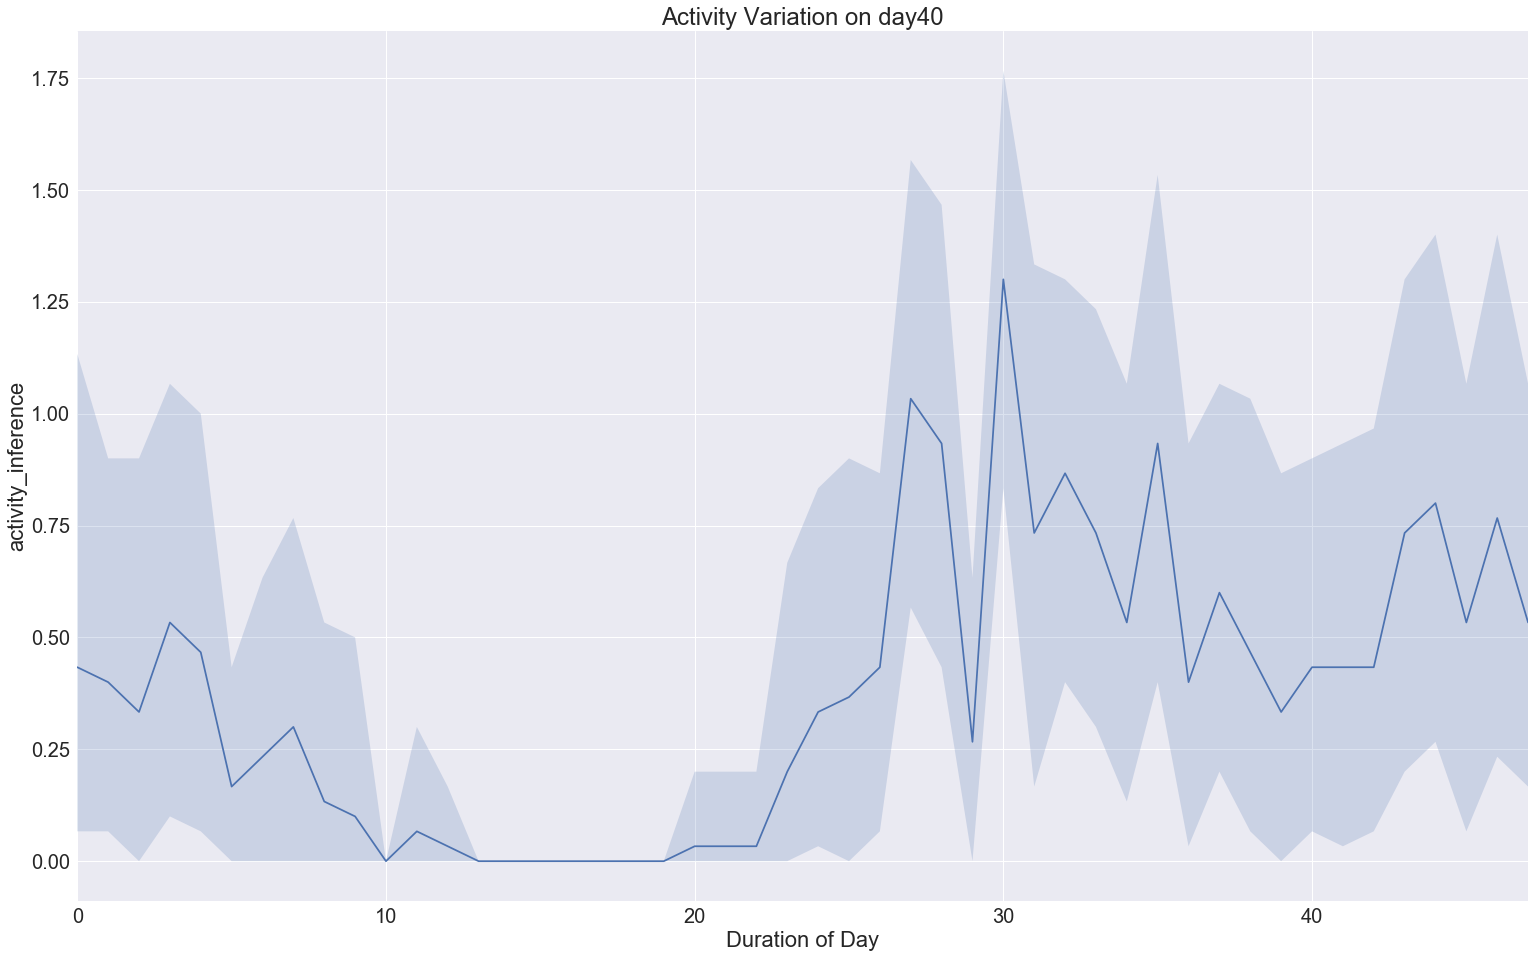

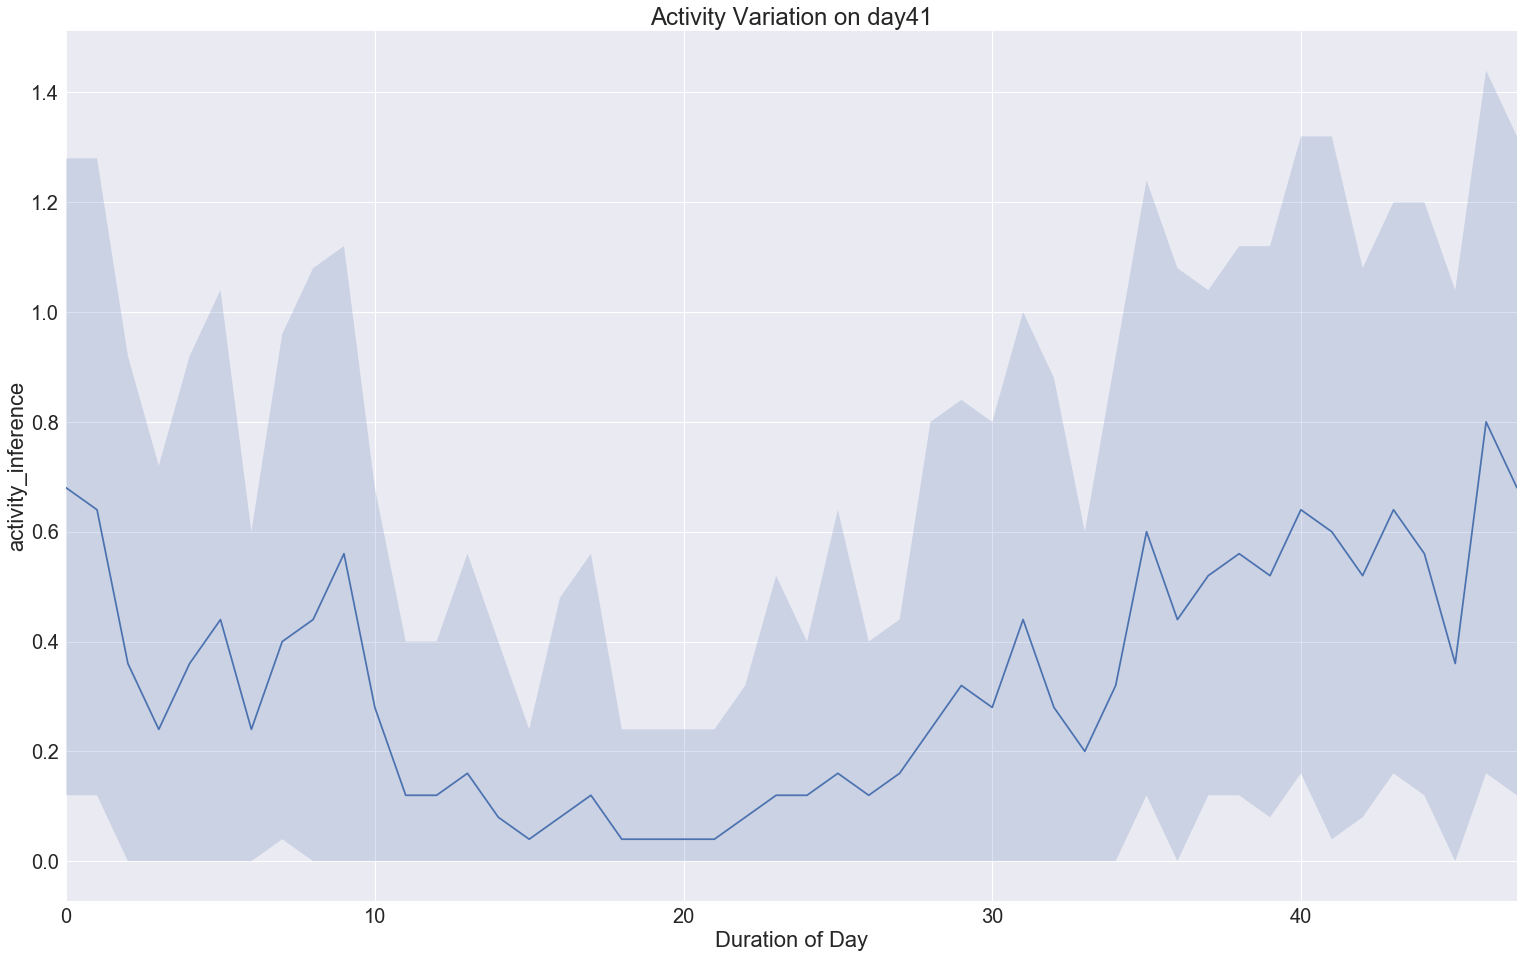

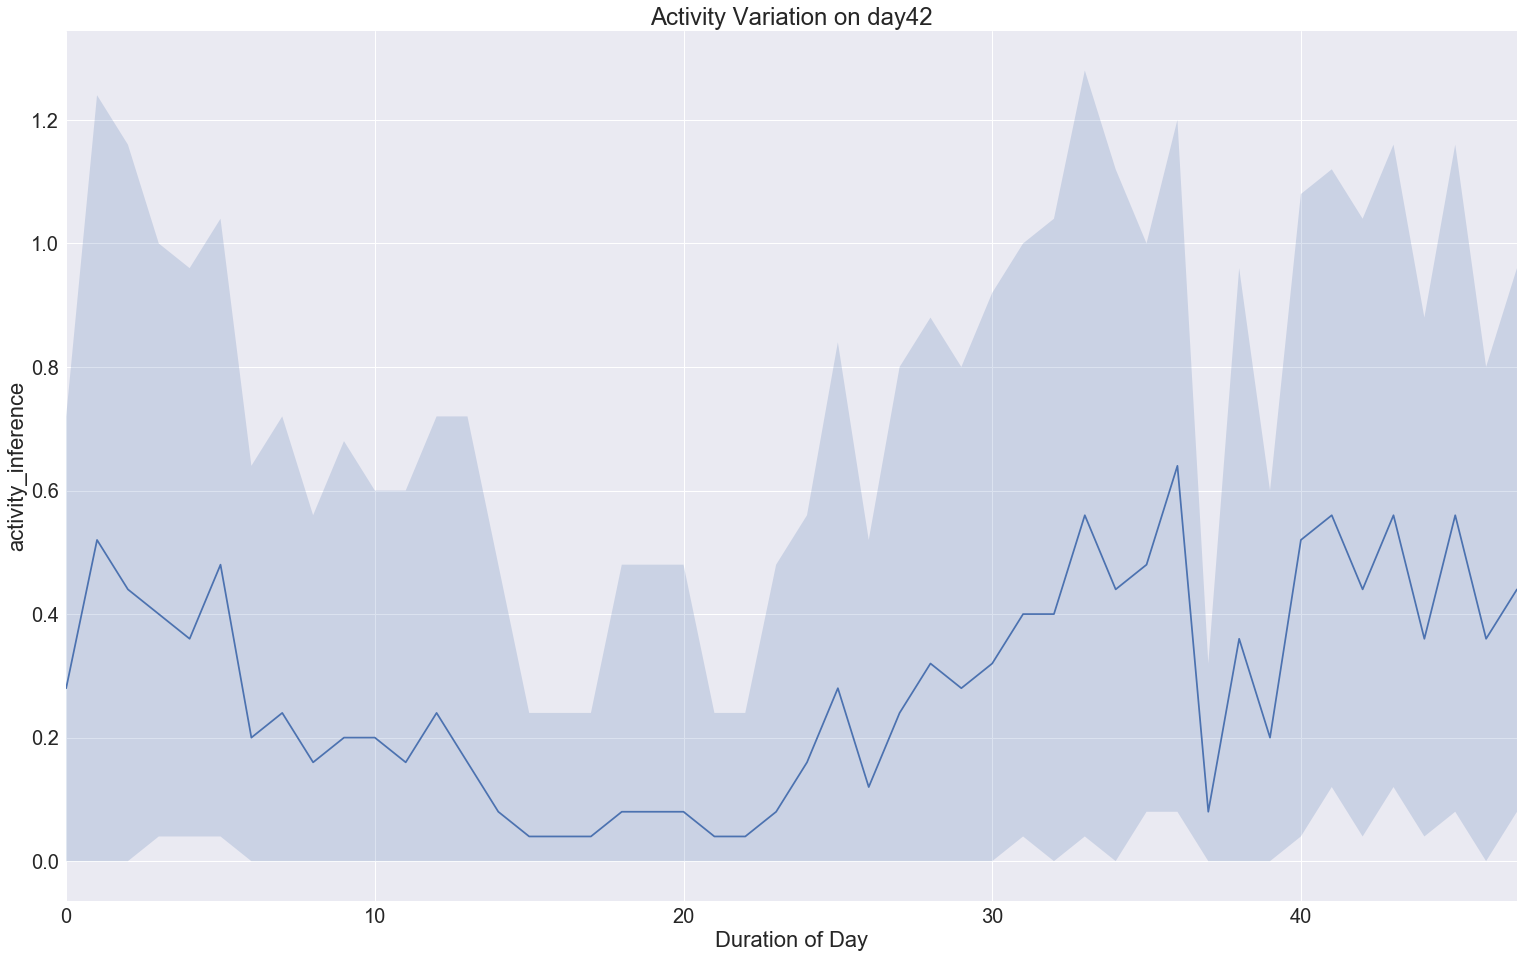

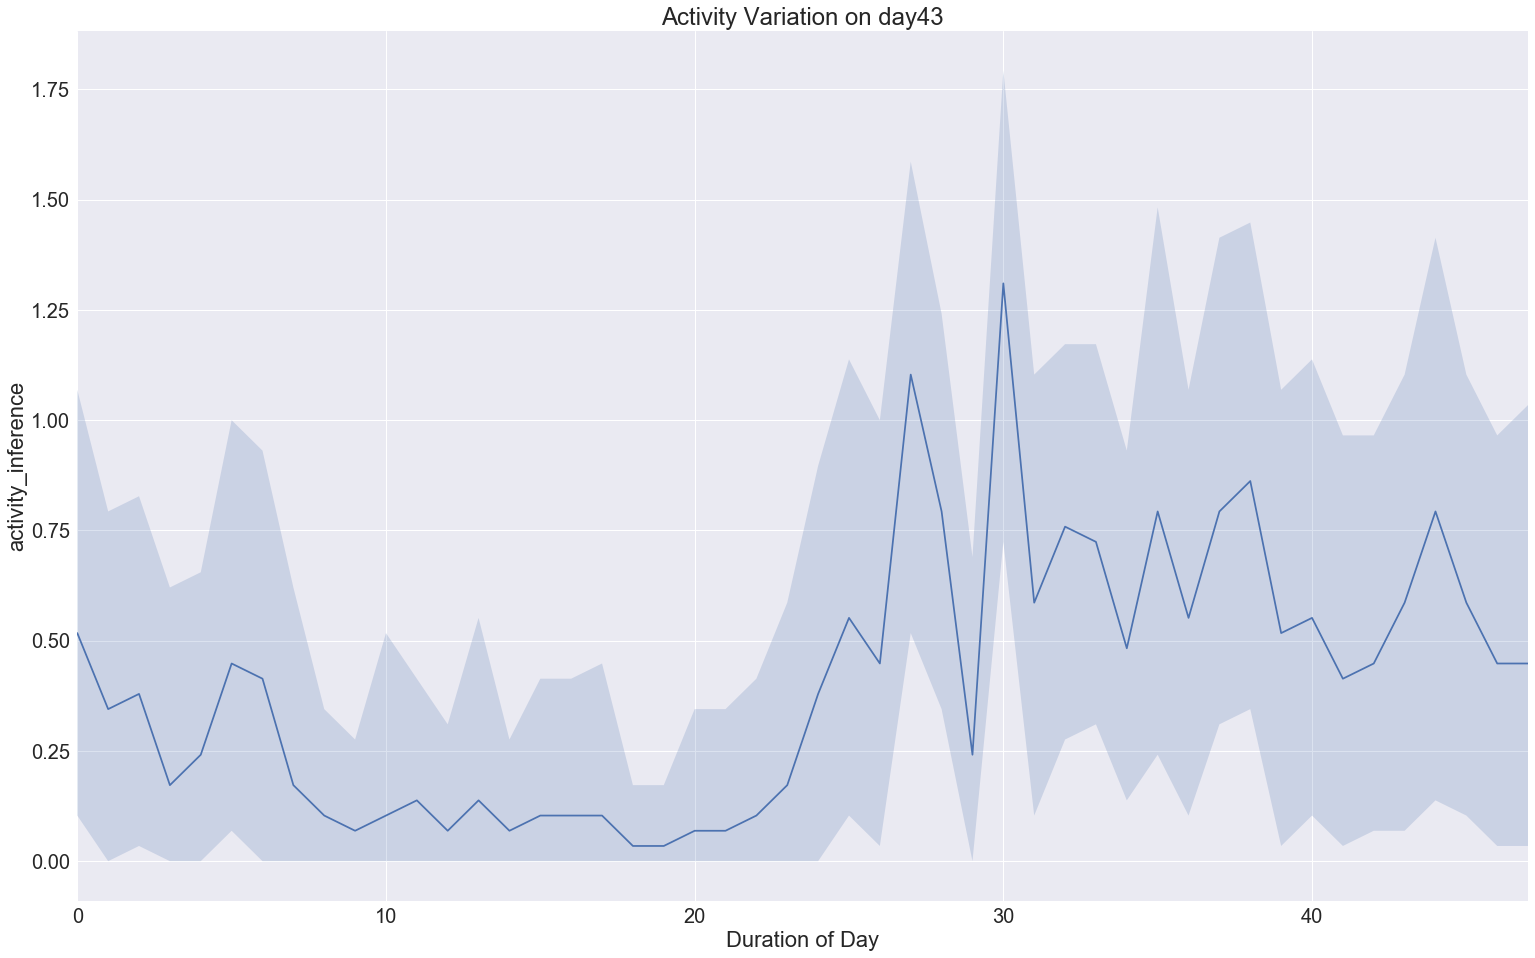

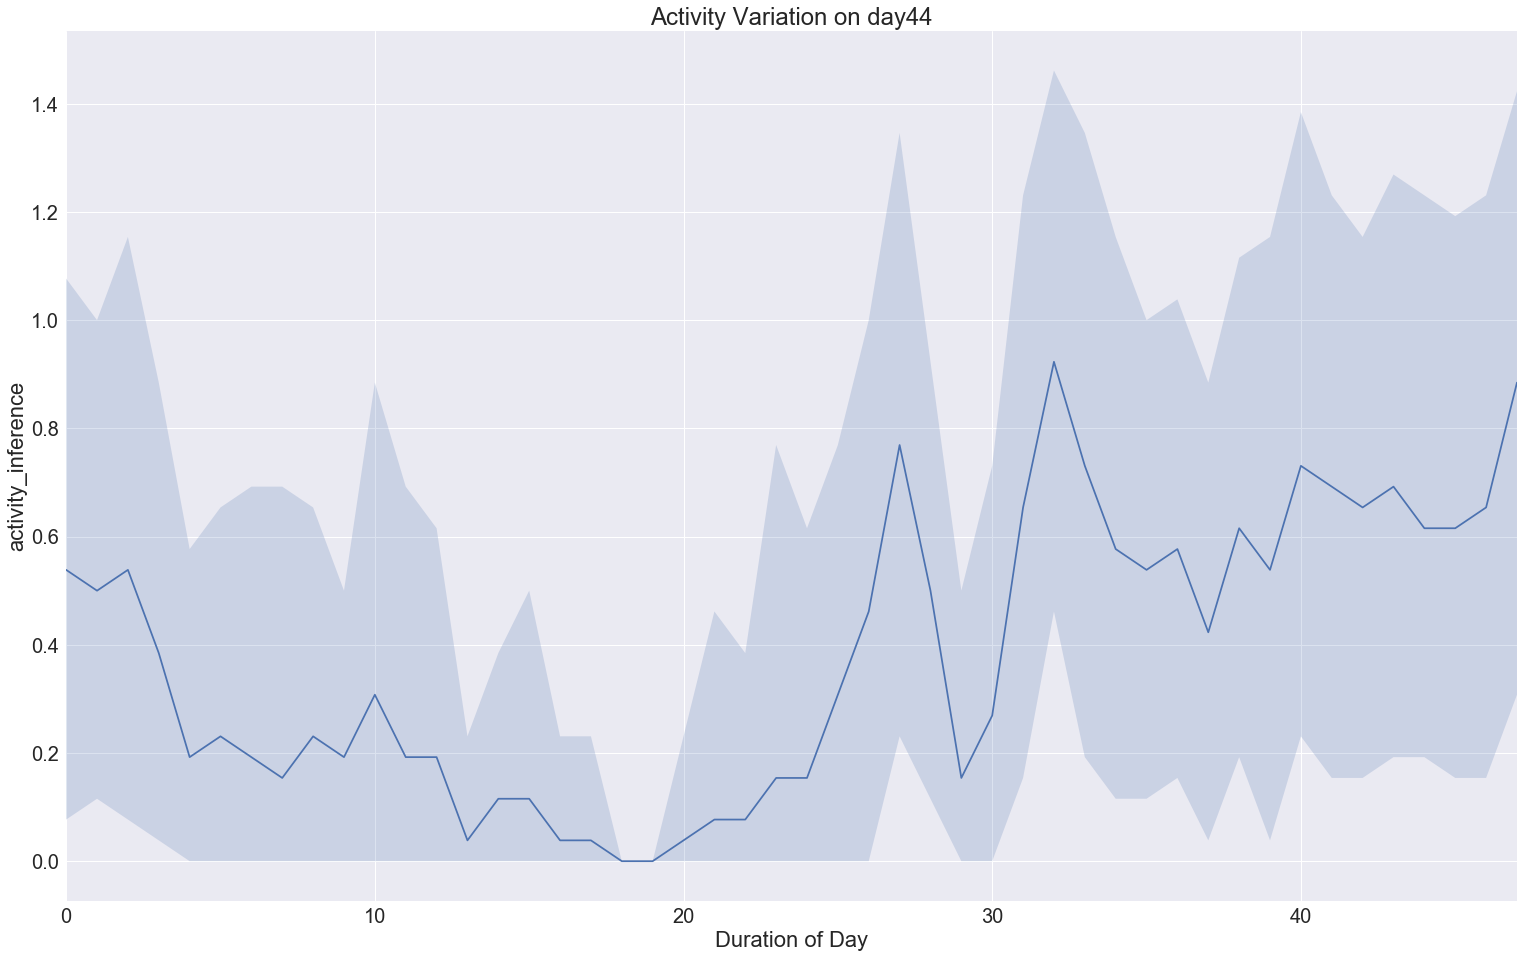

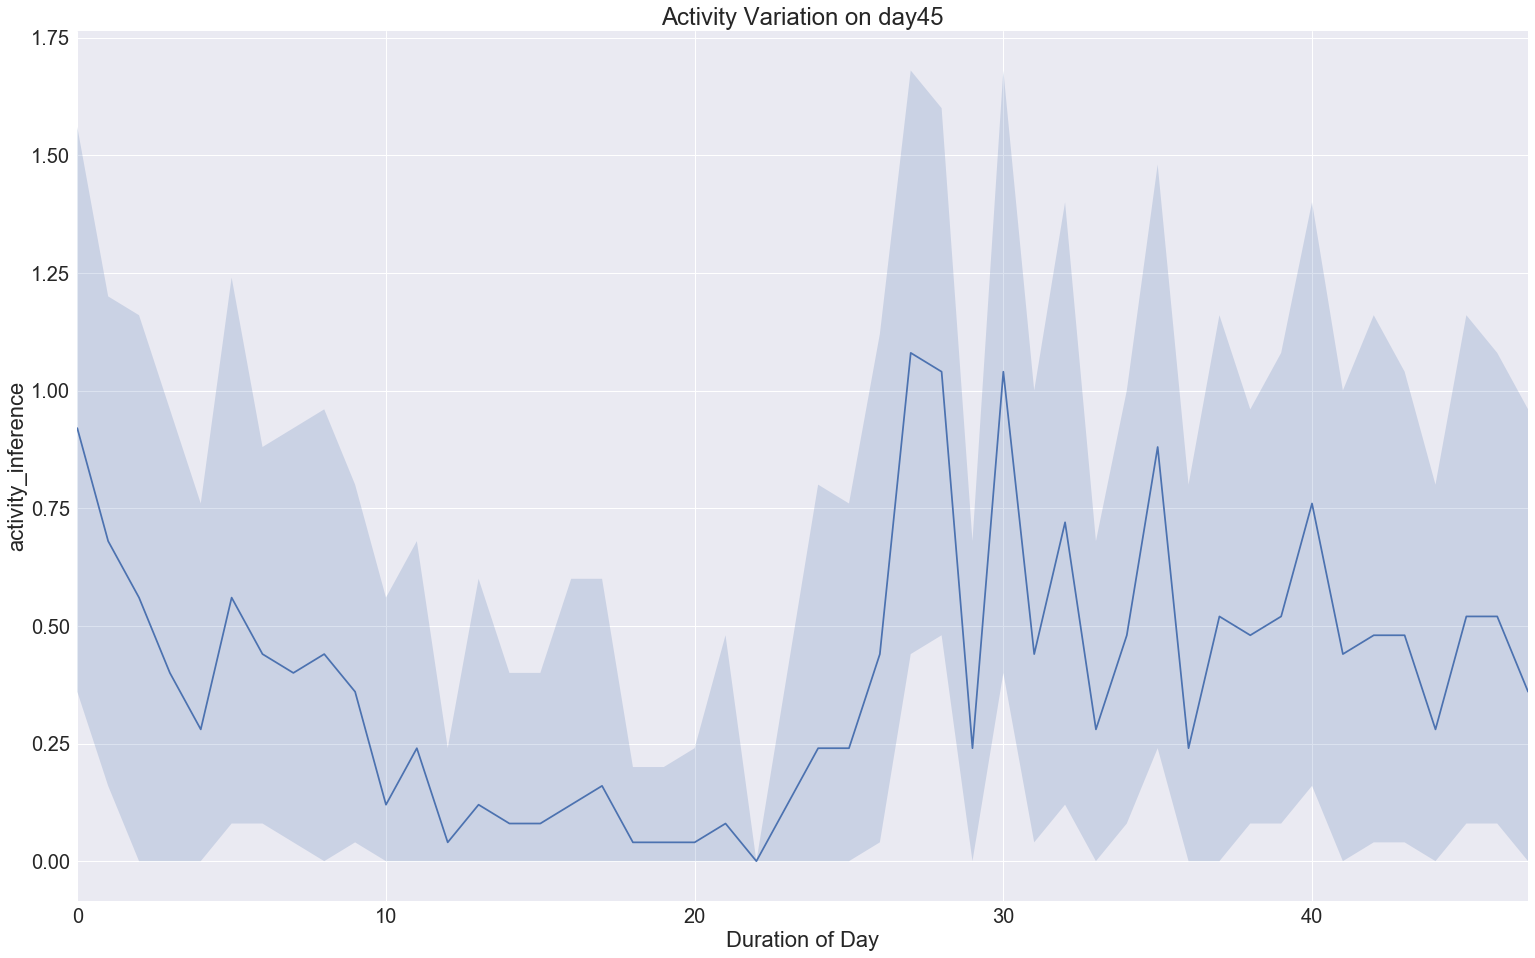

In [17]:
import pandas as pd
import os
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

start_date = datetime.datetime.strptime('24-03-13', '%d-%m-%y')
end_date = datetime.datetime.strptime('08-05-13', '%d-%m-%y')

for day_offset in range(4,46):
    
    # Least stressed day
    stress_day =  start_date + datetime.timedelta(days=day_offset)

    os.chdir('F:\Projects\DataProcessor\StudentLife Data')

    dir_list  = [folder for folder in  os.listdir() if 'student' in folder ]  

    activity_details_final = pd.DataFrame()


    for folder in dir_list:    

        file_name = folder+"\\activity_details_train_x.csv"

        if os.path.exists(file_name):
            activity_details = pd.read_csv(file_name, index_col=0, infer_datetime_format=True, parse_dates=[1])
        else:
            continue
        
        bool_1 =  activity_details['time']  < stress_day + datetime.timedelta(days=1)
        bool_2 =  activity_details['time']  >= stress_day 

        activity_details = activity_details[np.logical_and(bool_1, bool_2)]
        activity_details = activity_details[activity_details['activity_inference'] != 3]
        activity_details = activity_details.loc[:,['time','activity_inference', 'student_id']]


        activity_details_gen = activity_details.groupby(pd.Grouper(key='time', freq='30T')).max()
        activity_details_gen.reset_index(inplace=True)
        activity_details_gen.reset_index(inplace=True)
        
        
#         display(activity_details_gen.head())
#         print(len(activity_details_gen))
        
        if len(activity_details_gen) < 48:
            continue

        activity_details_final = activity_details_final.append(activity_details_gen, ignore_index=True) 
#         display(activity_details_final)
        

    activity_details_final['unit'] = activity_details_final.groupby('time').cumcount()+1
    
    # Plotting the values.
    plt.figure(figsize=(26,16))
    activity_details_final.fillna(value = 0, inplace=True)
    sns.tsplot(data=activity_details_final, time='index', value='activity_inference',  unit='unit', ci=[100] )
    sns.set(font_scale = 2)
    plt.title("Activity Variation on day"+ str(day_offset))
    plt.xlabel('Duration of Day')
    plt.savefig("F:\\Projects\\StudentLife-ML-Analysis\\Vizualization\\Plots\\ActivityViz\\activity_viz_all_studs_day_"+  str(day_offset)  +".jpg")